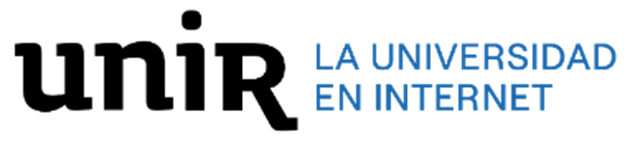

# Universidad Internacional de La Rioja
## Escuela Superior de Ingeniería y Tecnología

### Máster Universitario en Análisis y Visualización de Datos Masivos/ Visual Analytics and Big Data

### Pruebas Saber 11, modelo predictivo del desempeño académico a partir de factores socioeconómicos

#### Trabajo fin de estudio presentado por
- Carlos Augusto Valero González 
- Jhon Fredy Alvarez Perez 
- Nelson Alejandro Díaz Villalobos 

#### Director
- Arturo Peralta Martin Palomino 


## Importado de librerías

In [20]:
# Librerías básicas
import numpy as np
import pandas as pd
import plotly.io as pio
import matplotlib.pyplot as plt
import seaborn as sns


# Librerías para modelos predictivos
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import classification_report

from kneed import KneeLocator


## Lectura de los datos

In [21]:
# Indicar la ruta del archivo
archivo_csv = "Saber_11__2020-2_20240513.csv"

# Leer de la ruta indicada
datos = pd.read_csv(archivo_csv)

# Mostrar las primeras filas de los datos
datos.head()


,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,TI,SUIZA,F,03/03/2003 12:00:00 AM,20204,SB11202040211436,ESTUDIANTE,SUIZA,No,CUNDINAMARCA,...,55.0,81,A1,244,49,54.882365,3.0,3.0,PUBLICAR,NO
1,PEP,VENEZUELA,M,05/10/2002 12:00:00 AM,20204,SB11202040433216,ESTUDIANTE,VENEZUELA,No,CUNDINAMARCA,...,33.0,6,A-,238,44,49.252311,2.0,2.0,PUBLICAR,NO
2,TI,VENEZUELA,F,12/14/2003 12:00:00 AM,20204,SB11202040244180,ESTUDIANTE,VENEZUELA,No,CUNDINAMARCA,...,59.0,87,A2,325,94,40.733672,1.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD
3,CE,VENEZUELA,M,04/12/2003 12:00:00 AM,20204,SB11202040210971,ESTUDIANTE,VENEZUELA,No,CUNDINAMARCA,...,47.0,58,A-,238,45,48.217953,2.0,3.0,PUBLICAR,NO
4,TI,COLOMBIA,F,03/03/2004 12:00:00 AM,20204,SB11202040235382,ESTUDIANTE,COLOMBIA,No,CUNDINAMARCA,...,43.0,40,A-,202,19,60.912192,3.0,3.0,PUBLICAR,NO


## Análisis Exploratorio Inicial

### Descripción del DataFrame

In [22]:
# Mostrar medidas estadísticas para las variables numéricas, de forma traspuesta para facilitar la lectura
datos.describe().T

,count,mean,std,min,25%,50%,75%,max
PERIODO,504872.0,2.020400e+04,0.000000e+00,2.020400e+04,2.020400e+04,2.020400e+04,2.020400e+04,2.020400e+04
ESTU_COD_RESIDE_DEPTO,504870.0,3.609967e+01,6.138110e+02,5.000000e+00,1.100000e+01,2.000000e+01,5.400000e+01,9.999900e+04
ESTU_COD_RESIDE_MCPIO,504870.0,3.257905e+04,2.636752e+04,5.001000e+03,1.100100e+04,2.040000e+04,5.400100e+04,9.999900e+04
COLE_CODIGO_ICFES,504872.0,2.910736e+05,2.894432e+05,8.300000e+01,6.034300e+04,1.418380e+05,6.692670e+05,7.524440e+05
COLE_COD_DANE_ESTABLECIMIENTO,504872.0,2.013835e+11,9.096065e+10,1.050010e+11,1.158350e+11,1.730010e+11,3.050010e+11,8.548740e+11
COLE_COD_DANE_SEDE,504872.0,2.017896e+11,9.151341e+10,1.050010e+11,1.158610e+11,1.730010e+11,3.050010e+11,8.548740e+11
COLE_COD_MCPIO_UBICACION,504872.0,3.255715e+04,2.633793e+04,5.001000e+03,1.100100e+04,2.044300e+04,5.400100e+04,9.977300e+04
COLE_COD_DEPTO_UBICACION,504872.0,3.231800e+01,2.631266e+01,5.000000e+00,1.100000e+01,2.000000e+01,5.400000e+01,9.900000e+01
ESTU_COD_MCPIO_PRESENTACION,504664.0,3.258047e+04,2.640857e+04,5.001000e+03,1.100100e+04,2.023800e+04,5.400100e+04,9.977300e+04
ESTU_COD_DEPTO_PRESENTACION,504664.0,3.235859e+01,2.638201e+01,5.000000e+00,1.100000e+01,2.000000e+01,5.400000e+01,9.900000e+01


In [23]:
# Describir el esquema del dataframe
print("========================")
print("Esquema del DataFrame:")
print("========================")
print(datos.info())

Esquema del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504872 entries, 0 to 504871
Data columns (total 81 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ESTU_TIPODOCUMENTO             504872 non-null  object 
 1   ESTU_NACIONALIDAD              504872 non-null  object 
 2   ESTU_GENERO                    504864 non-null  object 
 3   ESTU_FECHANACIMIENTO           504872 non-null  object 
 4   PERIODO                        504872 non-null  int64  
 5   ESTU_CONSECUTIVO               504872 non-null  object 
 6   ESTU_ESTUDIANTE                504872 non-null  object 
 7   ESTU_PAIS_RESIDE               504872 non-null  object 
 8   ESTU_TIENEETNIA                501879 non-null  object 
 9   ESTU_DEPTO_RESIDE              504870 non-null  object 
 10  ESTU_COD_RESIDE_DEPTO          504870 non-null  float64
 11  ESTU_MCPIO_RESIDE              504870 non-null  object 
 12  ESTU_CO

### Se inicia con la limpieza del DataFrame

### Eliminado de columnas innecesarias

In [24]:
# Definir campos que no se van a considerar en el desarrollo de los modelos
columnas_eliminar = [
    'ESTU_TIPODOCUMENTO', 'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_ESTUDIANTE',
    'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE', 'ESTU_COD_RESIDE_MCPIO',
    'COLE_CODIGO_ICFES', 'COLE_GENERO', 'COLE_NATURALEZA', 'COLE_CALENDARIO',
    'COLE_BILINGUE', 'COLE_CARACTER', 'COLE_COD_DANE_SEDE', 'COLE_NOMBRE_SEDE',
    'COLE_AREA_UBICACION', 'COLE_JORNADA', 'COLE_COD_MCPIO_UBICACION',
    'COLE_MCPIO_UBICACION', 'COLE_COD_DEPTO_UBICACION', 'COLE_DEPTO_UBICACION',
    'ESTU_COD_MCPIO_PRESENTACION', 'ESTU_MCPIO_PRESENTACION', 'ESTU_DEPTO_PRESENTACION',
    'ESTU_COD_DEPTO_PRESENTACION', 'ESTU_INSE_INDIVIDUAL', 'ESTU_NSE_INDIVIDUAL',
    'ESTU_NSE_ESTABLECIMIENTO', 'ESTU_ESTADOINVESTIGACION', 'ESTU_GENERACION-E', 'ESTU_CONSECUTIVO', 'ESTU_PAIS_RESIDE', 'ESTU_DEPTO_RESIDE', 'FAMI_PERSONASHOGAR',
    'FAMI_CUARTOSHOGAR', 'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE', 'FAMI_NUMLIBROS',
    'COLE_SEDE_PRINCIPAL', 'PERCENTIL_GLOBAL', 'PERCENTIL_INGLES', 'PERCENTIL_SOCIALES_CIUDADANAS',
    'PERCENTIL_C_NATURALES', 'PERCENTIL_MATEMATICAS', 'PERCENTIL_LECTURA_CRITICA','ESTU_PRIVADO_LIBERTAD','COLE_NOMBRE_ESTABLECIMIENTO'
    ,'COLE_COD_DANE_ESTABLECIMIENTO',"PUNT_LECTURA_CRITICA",    "DESEMP_LECTURA_CRITICA",    "PUNT_MATEMATICAS",    "DESEMP_MATEMATICAS",    "PUNT_C_NATURALES",    "DESEMP_C_NATURALES",    "PUNT_SOCIALES_CIUDADANAS",    "DESEMP_SOCIALES_CIUDADANAS",    "PUNT_INGLES"
    ,    "DESEMP_INGLES"
]

# Imprimir los campos especificados
datos[columnas_eliminar].head()

,ESTU_TIPODOCUMENTO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_ESTUDIANTE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,COLE_CODIGO_ICFES,COLE_GENERO,COLE_NATURALEZA,...,PUNT_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,DESEMP_INGLES
0,TI,03/03/2003 12:00:00 AM,20204,ESTUDIANTE,25.0,CAJICÁ,25126.0,679225,MIXTO,OFICIAL,...,54,3,65,3,41,2,33,1,55.0,A1
1,PEP,05/10/2002 12:00:00 AM,20204,ESTUDIANTE,25.0,CAJICÁ,25126.0,706085,MIXTO,OFICIAL,...,57,3,43,2,46,2,49,2,33.0,A-
2,TI,12/14/2003 12:00:00 AM,20204,ESTUDIANTE,25.0,CAJICÁ,25126.0,679225,MIXTO,OFICIAL,...,59,3,72,4,63,3,68,3,59.0,A2
3,CE,04/12/2003 12:00:00 AM,20204,ESTUDIANTE,25.0,CAJICÁ,25126.0,679225,MIXTO,OFICIAL,...,47,2,55,3,46,2,43,2,47.0,A-
4,TI,03/03/2004 12:00:00 AM,20204,ESTUDIANTE,25.0,CAJICÁ,25126.0,679217,MIXTO,OFICIAL,...,37,2,48,2,44,2,32,1,43.0,A-


In [25]:
# Eliminar las columnas especificadas
df = datos.drop(columns=columnas_eliminar)

# Imprimir el DataFrame resultante
df.head()

,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_TIENEETNIA,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,...,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,PUNT_GLOBAL
0,SUIZA,F,No,Estrato 2,Técnica o tecnológica completa,Educación profesional completa,Si,Si,Si,Si,...,No,3 a 5 veces por semana,1 o 2 veces por semana,3 a 5 veces por semana,Peor,30 minutos o menos,Más de 3 horas,0,No,244
1,VENEZUELA,M,No,Estrato 3,Secundaria (Bachillerato) completa,Educación profesional completa,Si,Si,No,No,...,No,3 a 5 veces por semana,Todos o casi todos los días,3 a 5 veces por semana,Mejor,No leo por entretenimiento,Más de 3 horas,Entre 11 y 20 horas,"Si, en efectivo",238
2,VENEZUELA,F,No,Estrato 1,Primaria incompleta,Secundaria (Bachillerato) incompleta,No,Si,No,Si,...,No,1 o 2 veces por semana,3 a 5 veces por semana,3 a 5 veces por semana,Igual,Entre 30 y 60 minutos,30 minutos o menos,0,"Si, en efectivo",325
3,VENEZUELA,M,No,Sin Estrato,Secundaria (Bachillerato) incompleta,Educación profesional completa,Si,Si,No,Si,...,No,Nunca o rara vez comemos eso,Nunca o rara vez comemos eso,3 a 5 veces por semana,Peor,30 minutos o menos,Entre 1 y 3 horas,0,No,238
4,COLOMBIA,F,No,Estrato 5,Secundaria (Bachillerato) completa,Educación profesional completa,Si,Si,Si,Si,...,Si,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Entre 1 y 2 horas,Entre 1 y 3 horas,Menos de 10 horas,"Si, en efectivo",202


In [26]:
#El nuevo el esquema del dataset
print("========================")
print("Esquema del DataFrame con las columnas a utilizar:")
print("========================")
df.info()

Esquema del DataFrame con las columnas a utilizar:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504872 entries, 0 to 504871
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   ESTU_NACIONALIDAD              504872 non-null  object
 1   ESTU_GENERO                    504864 non-null  object
 2   ESTU_TIENEETNIA                501879 non-null  object
 3   FAMI_ESTRATOVIVIENDA           487920 non-null  object
 4   FAMI_EDUCACIONPADRE            491882 non-null  object
 5   FAMI_EDUCACIONMADRE            491386 non-null  object
 6   FAMI_TIENEINTERNET             491207 non-null  object
 7   FAMI_TIENESERVICIOTV           489433 non-null  object
 8   FAMI_TIENECOMPUTADOR           484678 non-null  object
 9   FAMI_TIENELAVADORA             488640 non-null  object
 10  FAMI_TIENEHORNOMICROOGAS       487730 non-null  object
 11  FAMI_TIENEAUTOMOVIL            487063 non-null  objec

### Tratamiento de valores nulos

In [27]:
# Obtener el conteo de valores nulos por columna
df_nulos = df.isnull().sum()

# Imprimir los valores nulos por columna
df_nulos.head(100)

ESTU_NACIONALIDAD                    0
ESTU_GENERO                          8
ESTU_TIENEETNIA                   2993
FAMI_ESTRATOVIVIENDA             16952
FAMI_EDUCACIONPADRE              12990
FAMI_EDUCACIONMADRE              13486
FAMI_TIENEINTERNET               13665
FAMI_TIENESERVICIOTV             15439
FAMI_TIENECOMPUTADOR             20194
FAMI_TIENELAVADORA               16232
FAMI_TIENEHORNOMICROOGAS         17142
FAMI_TIENEAUTOMOVIL              17809
FAMI_TIENEMOTOCICLETA            17086
FAMI_TIENECONSOLAVIDEOJUEGOS     17478
FAMI_COMELECHEDERIVADOS          13628
FAMI_COMECARNEPESCADOHUEVO       15306
FAMI_COMECEREALFRUTOSLEGUMBRE    20263
FAMI_SITUACIONECONOMICA          16314
ESTU_DEDICACIONLECTURADIARIA     14481
ESTU_DEDICACIONINTERNET          14626
ESTU_HORASSEMANATRABAJA          16984
ESTU_TIPOREMUNERACION            17646
PUNT_GLOBAL                          0
dtype: int64

In [28]:
# Eliminar todas las filas que contengan valores nulos
df_eliminar_nulos = df.dropna()

# validar la eliminacion de valores nulos por columna
df_eliminar_nulos.isnull().sum().head(100)

ESTU_NACIONALIDAD                0
ESTU_GENERO                      0
ESTU_TIENEETNIA                  0
FAMI_ESTRATOVIVIENDA             0
FAMI_EDUCACIONPADRE              0
FAMI_EDUCACIONMADRE              0
FAMI_TIENEINTERNET               0
FAMI_TIENESERVICIOTV             0
FAMI_TIENECOMPUTADOR             0
FAMI_TIENELAVADORA               0
FAMI_TIENEHORNOMICROOGAS         0
FAMI_TIENEAUTOMOVIL              0
FAMI_TIENEMOTOCICLETA            0
FAMI_TIENECONSOLAVIDEOJUEGOS     0
FAMI_COMELECHEDERIVADOS          0
FAMI_COMECARNEPESCADOHUEVO       0
FAMI_COMECEREALFRUTOSLEGUMBRE    0
FAMI_SITUACIONECONOMICA          0
ESTU_DEDICACIONLECTURADIARIA     0
ESTU_DEDICACIONINTERNET          0
ESTU_HORASSEMANATRABAJA          0
ESTU_TIPOREMUNERACION            0
PUNT_GLOBAL                      0
dtype: int64

In [29]:
print("========================")
print("Esquema del DataFrame sin nulos:")
print("========================")
df_eliminar_nulos.info()

Esquema del DataFrame sin nulos:
<class 'pandas.core.frame.DataFrame'>
Index: 452898 entries, 0 to 504871
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   ESTU_NACIONALIDAD              452898 non-null  object
 1   ESTU_GENERO                    452898 non-null  object
 2   ESTU_TIENEETNIA                452898 non-null  object
 3   FAMI_ESTRATOVIVIENDA           452898 non-null  object
 4   FAMI_EDUCACIONPADRE            452898 non-null  object
 5   FAMI_EDUCACIONMADRE            452898 non-null  object
 6   FAMI_TIENEINTERNET             452898 non-null  object
 7   FAMI_TIENESERVICIOTV           452898 non-null  object
 8   FAMI_TIENECOMPUTADOR           452898 non-null  object
 9   FAMI_TIENELAVADORA             452898 non-null  object
 10  FAMI_TIENEHORNOMICROOGAS       452898 non-null  object
 11  FAMI_TIENEAUTOMOVIL            452898 non-null  object
 12  FAMI_TIENEMOTOCI

### Tratamiento de filas duplicadas

In [30]:
# Verificar si hay filas duplicadas
hay_filas_duplicadas = df_eliminar_nulos.duplicated().any()

# Imprimir el resultado
if hay_filas_duplicadas:
    print("Hay filas duplicadas")
else:
    print("No hay filas duplicadas")

Hay filas duplicadas


In [31]:
# Eliminar filas duplicadas
df_sin_duplicados = df_eliminar_nulos.drop_duplicates()

# Verificar si hay filas duplicadas
hay_filas_duplicadas = df_sin_duplicados.duplicated().any()

# Imprimir el resultado
if hay_filas_duplicadas:
    print("Hay filas duplicadas")
else:
    print("No hay filas duplicadas")


No hay filas duplicadas


### Tratamiendo de los tipos de datos

In [32]:
# Lista de columnas a convertir en categorías
columnas_a_categoria = [
'ESTU_NACIONALIDAD',
'FAMI_ESTRATOVIVIENDA',
'FAMI_EDUCACIONPADRE',
'FAMI_EDUCACIONMADRE',
'FAMI_COMELECHEDERIVADOS',
'FAMI_COMECARNEPESCADOHUEVO',
'FAMI_COMECEREALFRUTOSLEGUMBRE',
'FAMI_SITUACIONECONOMICA',
'ESTU_DEDICACIONLECTURADIARIA',
'ESTU_DEDICACIONINTERNET',
'ESTU_HORASSEMANATRABAJA',
'ESTU_TIPOREMUNERACION',
'ESTU_GENERO',
'ESTU_TIENEETNIA',
'FAMI_TIENEINTERNET',
'FAMI_TIENESERVICIOTV',
'FAMI_TIENECOMPUTADOR',
'FAMI_TIENELAVADORA',
'FAMI_TIENEHORNOMICROOGAS',
'FAMI_TIENEAUTOMOVIL',
'FAMI_TIENEMOTOCICLETA',
'FAMI_TIENECONSOLAVIDEOJUEGOS'
]

# Convertir las columnas en categorías
df_sin_duplicados[columnas_a_categoria] = df_sin_duplicados[columnas_a_categoria].astype('category')

print("========================")
print("Esquema del DataFrame con tipos de datos como categoría:")
print("========================")
df_sin_duplicados.info()


Esquema del DataFrame con tipos de datos como categoría:
<class 'pandas.core.frame.DataFrame'>
Index: 452686 entries, 0 to 504871
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   ESTU_NACIONALIDAD              452686 non-null  category
 1   ESTU_GENERO                    452686 non-null  category
 2   ESTU_TIENEETNIA                452686 non-null  category
 3   FAMI_ESTRATOVIVIENDA           452686 non-null  category
 4   FAMI_EDUCACIONPADRE            452686 non-null  category
 5   FAMI_EDUCACIONMADRE            452686 non-null  category
 6   FAMI_TIENEINTERNET             452686 non-null  category
 7   FAMI_TIENESERVICIOTV           452686 non-null  category
 8   FAMI_TIENECOMPUTADOR           452686 non-null  category
 9   FAMI_TIENELAVADORA             452686 non-null  category
 10  FAMI_TIENEHORNOMICROOGAS       452686 non-null  category
 11  FAMI_TIENEAUTOMOVIL       

C:\Users\diazn\AppData\Local\Temp\ipykernel_33604\1087807150.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_duplicados[columnas_a_categoria] = df_sin_duplicados[columnas_a_categoria].astype('category')


### DataFrame limpio

In [33]:
df_sin_duplicados.head()

,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_TIENEETNIA,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,...,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,PUNT_GLOBAL
0,SUIZA,F,No,Estrato 2,Técnica o tecnológica completa,Educación profesional completa,Si,Si,Si,Si,...,No,3 a 5 veces por semana,1 o 2 veces por semana,3 a 5 veces por semana,Peor,30 minutos o menos,Más de 3 horas,0,No,244
1,VENEZUELA,M,No,Estrato 3,Secundaria (Bachillerato) completa,Educación profesional completa,Si,Si,No,No,...,No,3 a 5 veces por semana,Todos o casi todos los días,3 a 5 veces por semana,Mejor,No leo por entretenimiento,Más de 3 horas,Entre 11 y 20 horas,"Si, en efectivo",238
2,VENEZUELA,F,No,Estrato 1,Primaria incompleta,Secundaria (Bachillerato) incompleta,No,Si,No,Si,...,No,1 o 2 veces por semana,3 a 5 veces por semana,3 a 5 veces por semana,Igual,Entre 30 y 60 minutos,30 minutos o menos,0,"Si, en efectivo",325
3,VENEZUELA,M,No,Sin Estrato,Secundaria (Bachillerato) incompleta,Educación profesional completa,Si,Si,No,Si,...,No,Nunca o rara vez comemos eso,Nunca o rara vez comemos eso,3 a 5 veces por semana,Peor,30 minutos o menos,Entre 1 y 3 horas,0,No,238
4,COLOMBIA,F,No,Estrato 5,Secundaria (Bachillerato) completa,Educación profesional completa,Si,Si,Si,Si,...,Si,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Entre 1 y 2 horas,Entre 1 y 3 horas,Menos de 10 horas,"Si, en efectivo",202


In [39]:
# Nombre de la columna correspondiente a la variable dependiente en el DataFrame
columna_y = "PUNT_GLOBAL"

# Distribución de Variables
### Visualizaremos la distribución de algunas de las variables categóricas.

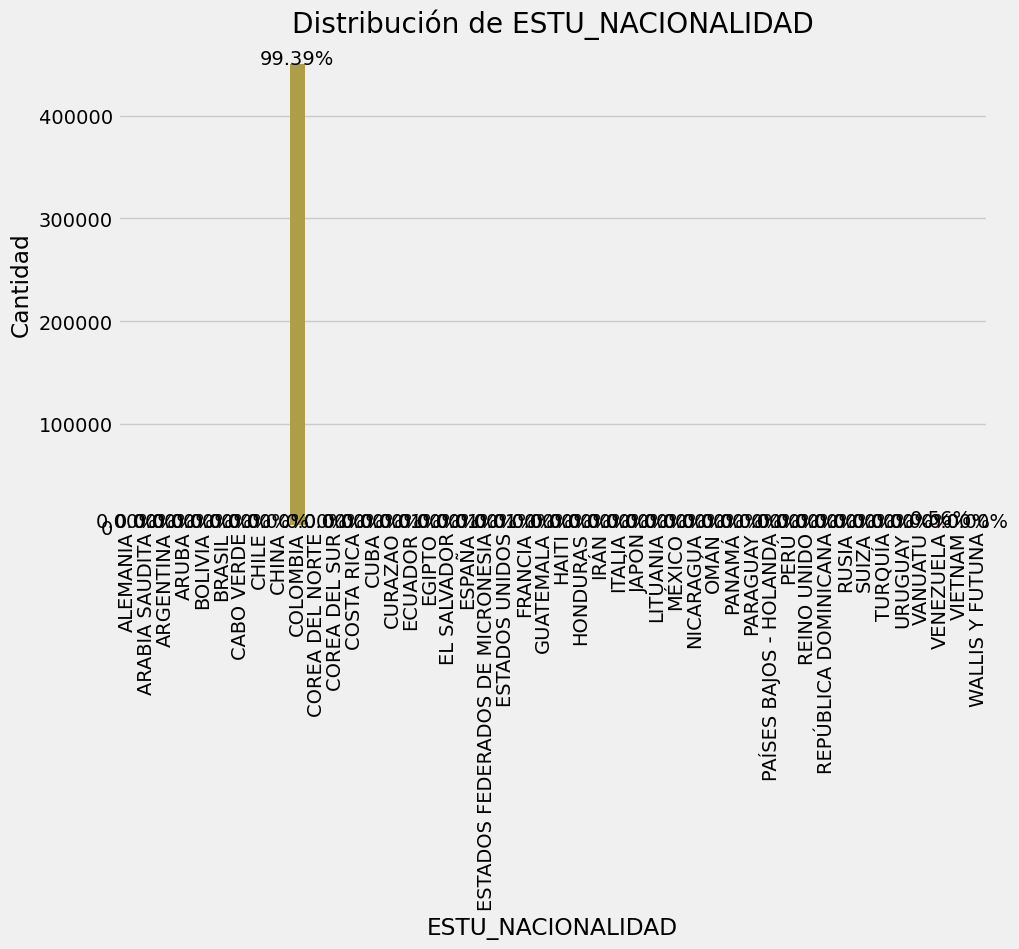

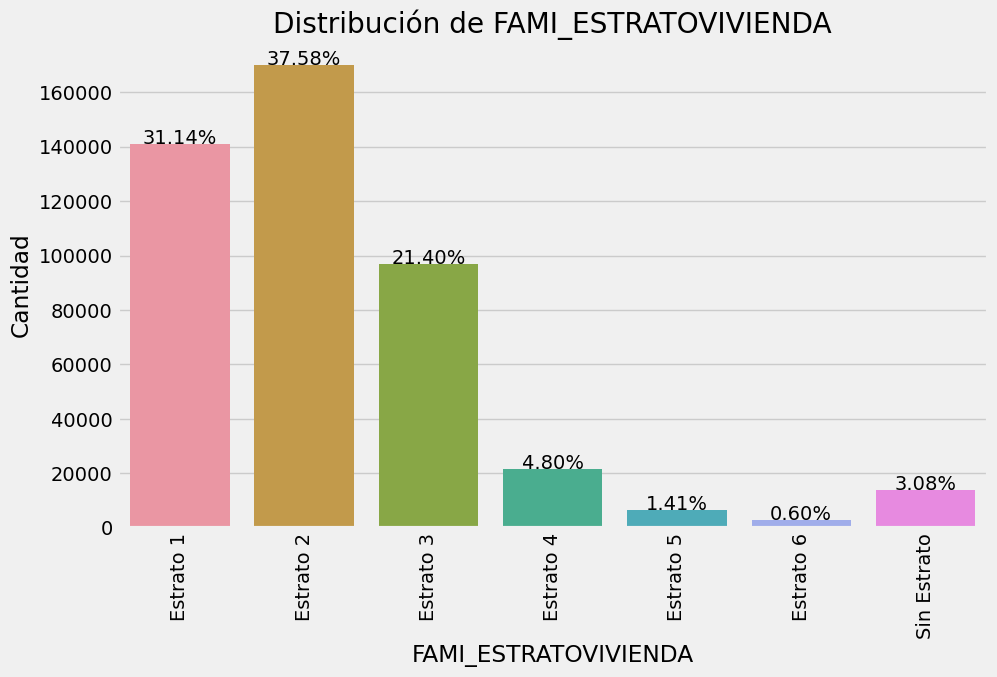

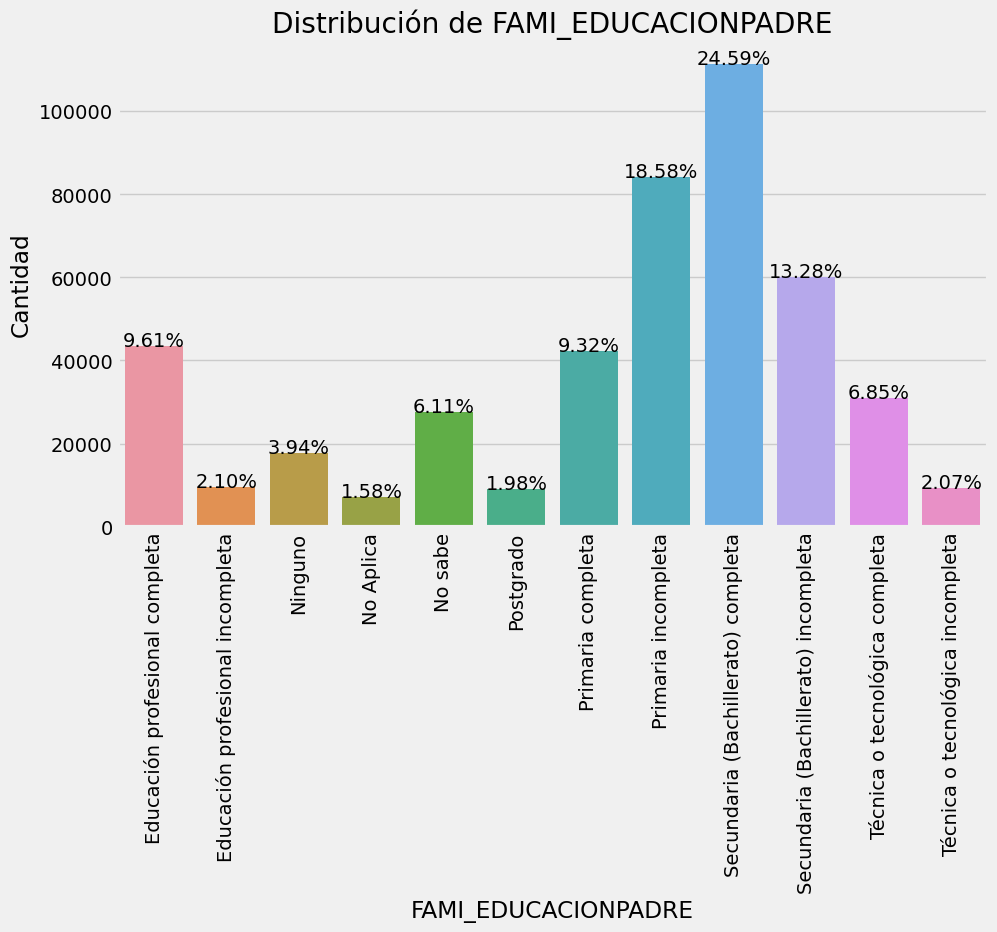

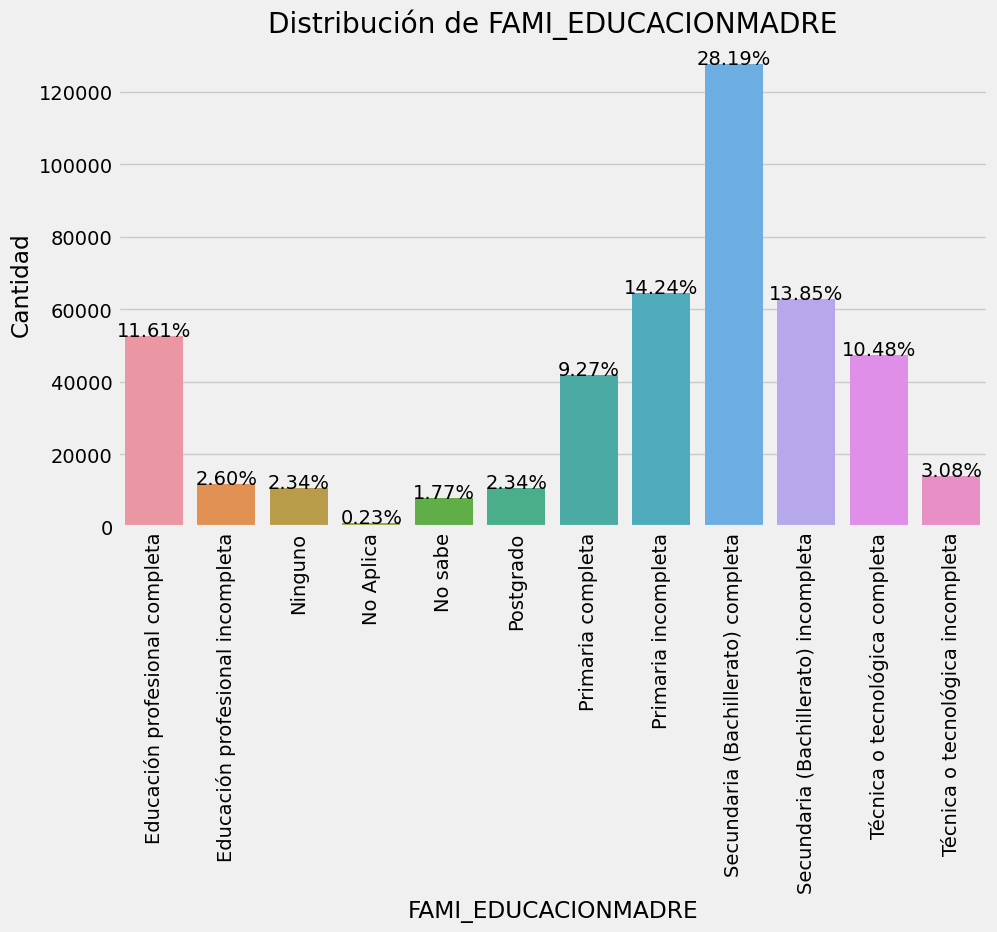

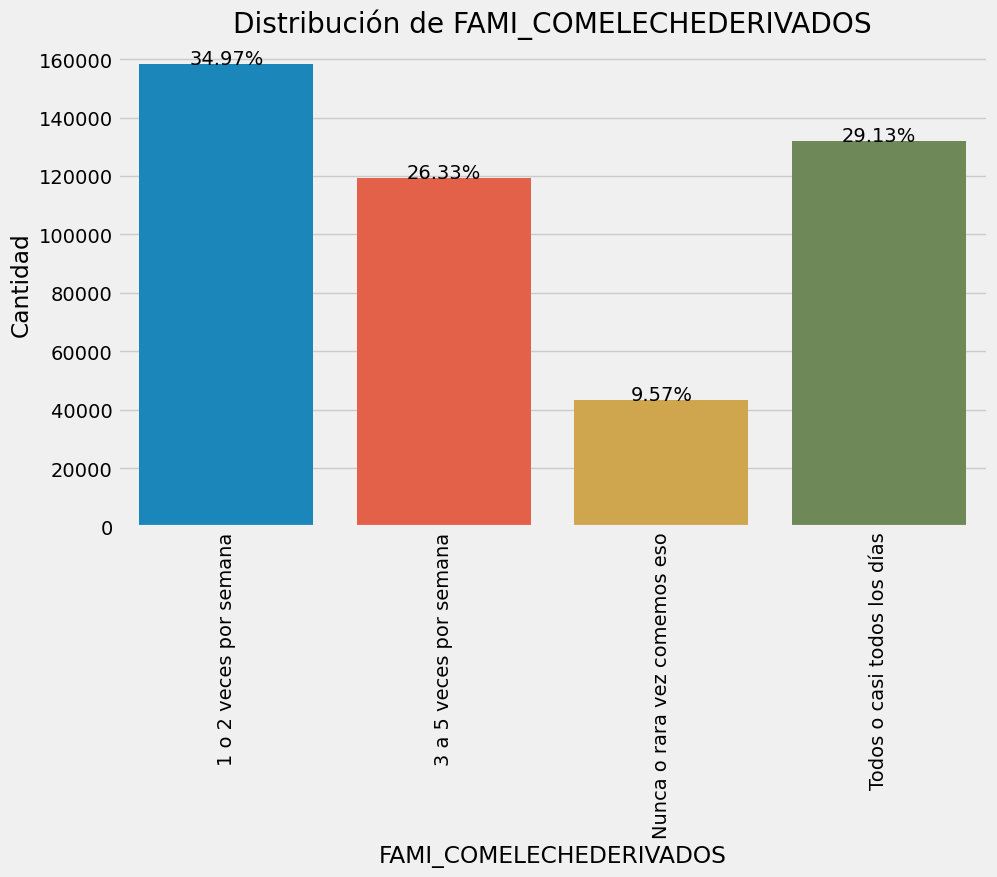

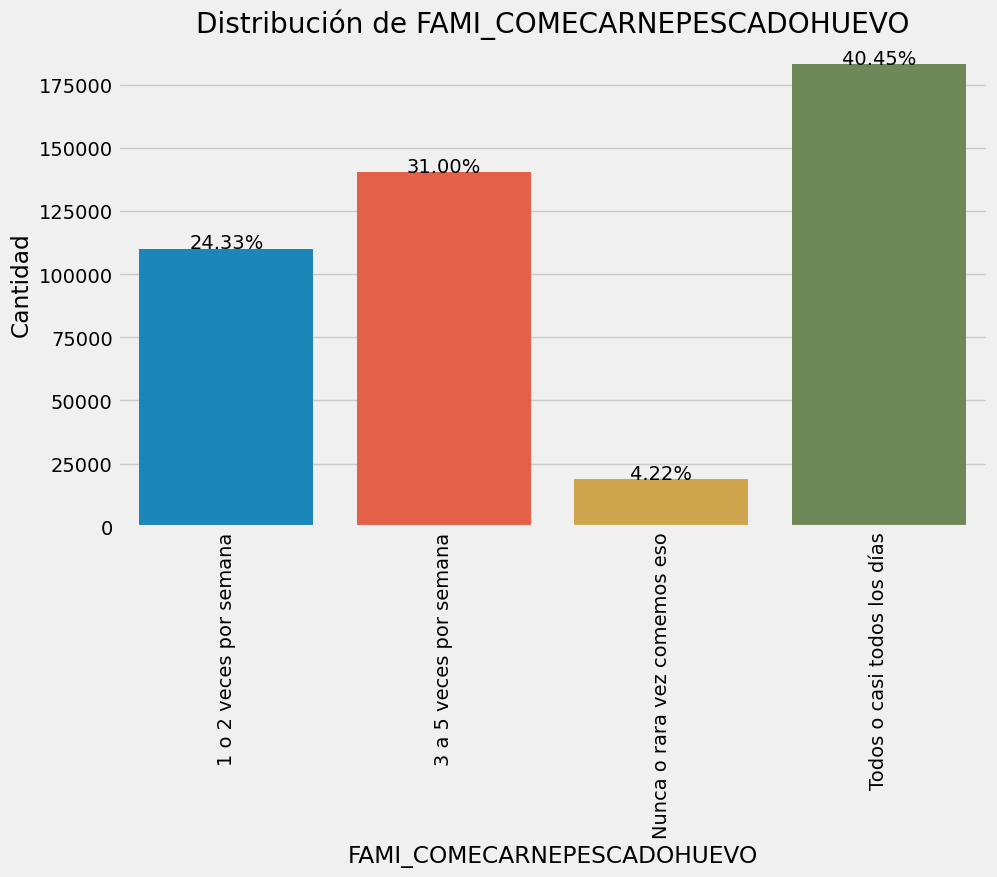

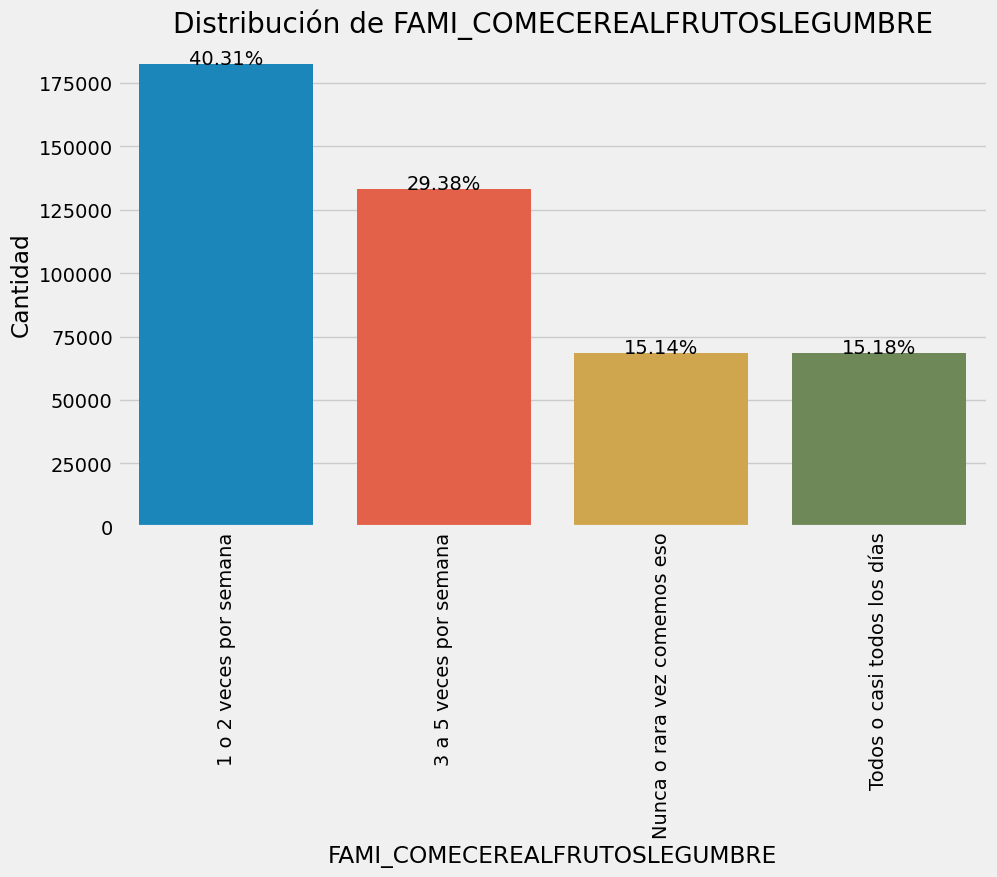

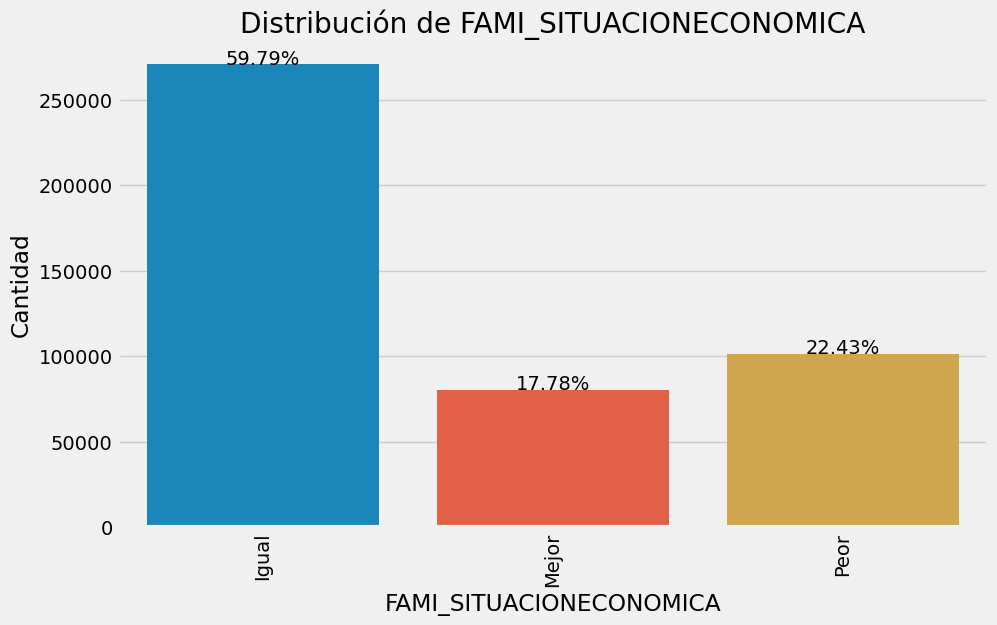

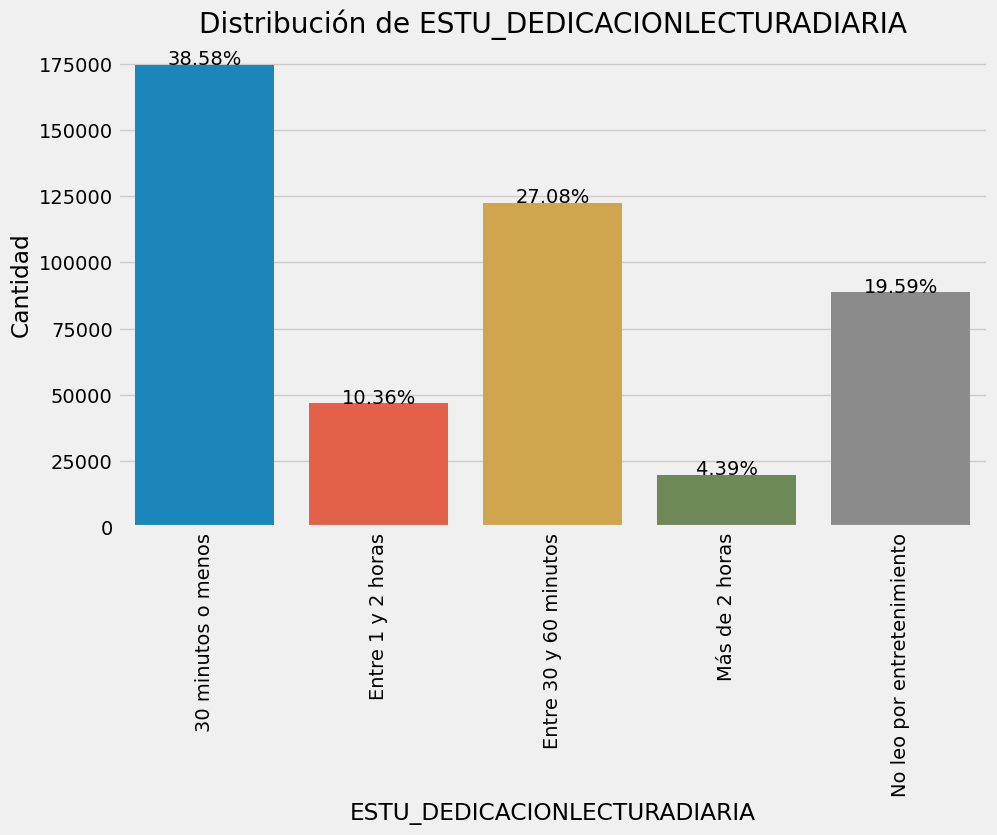

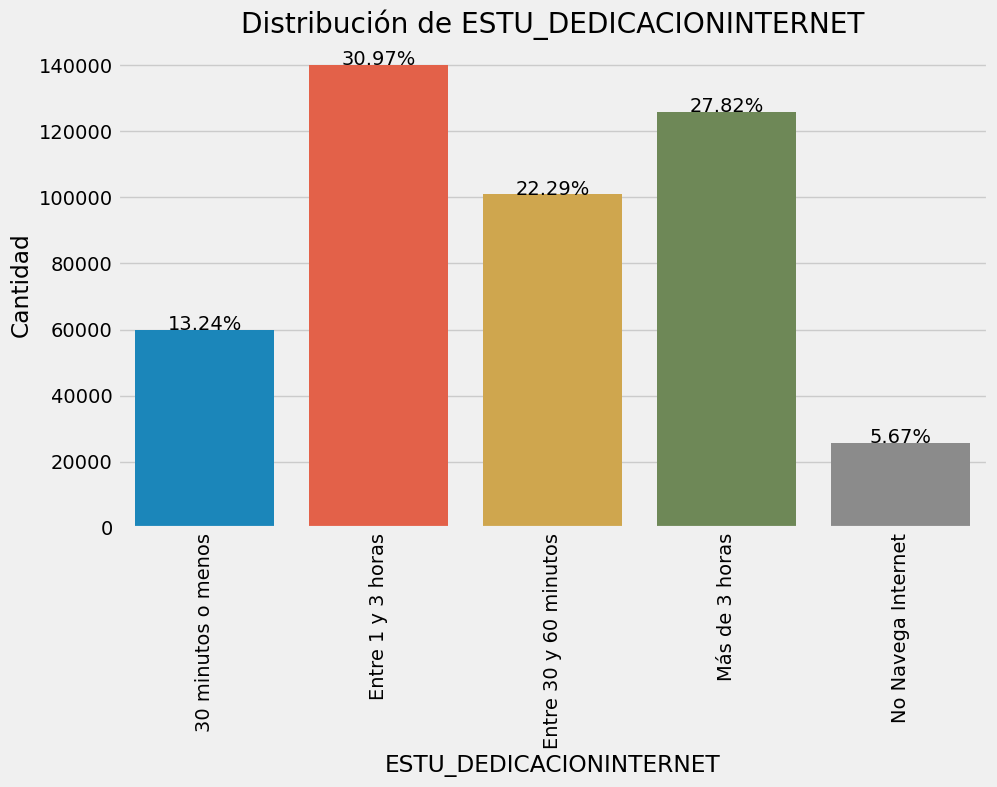

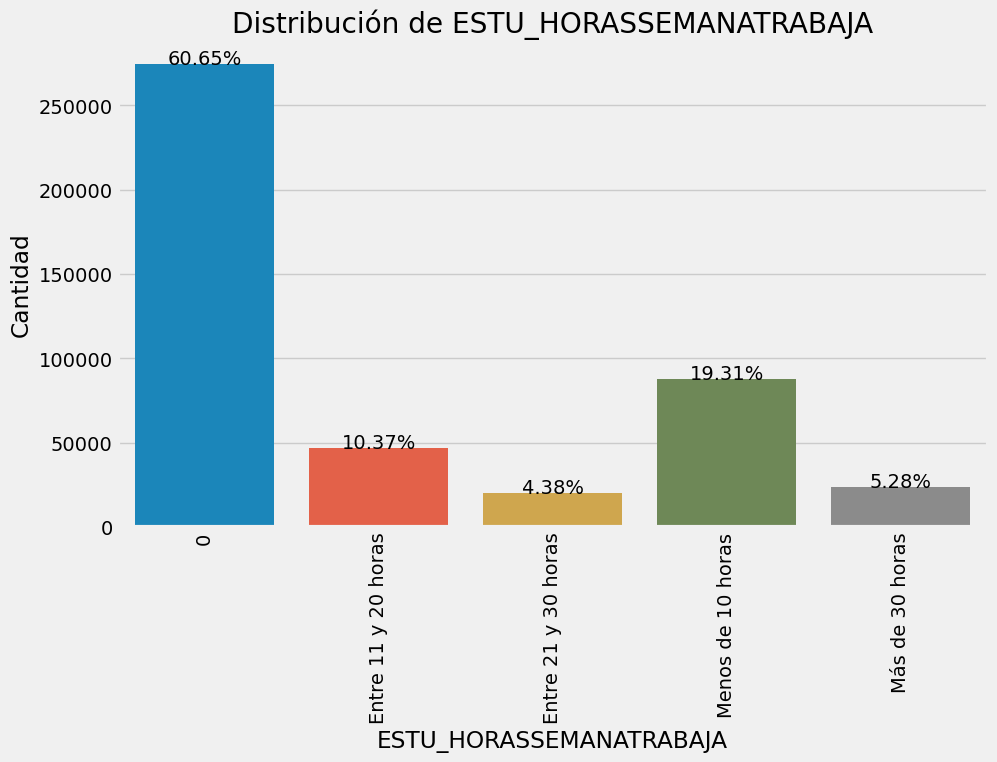

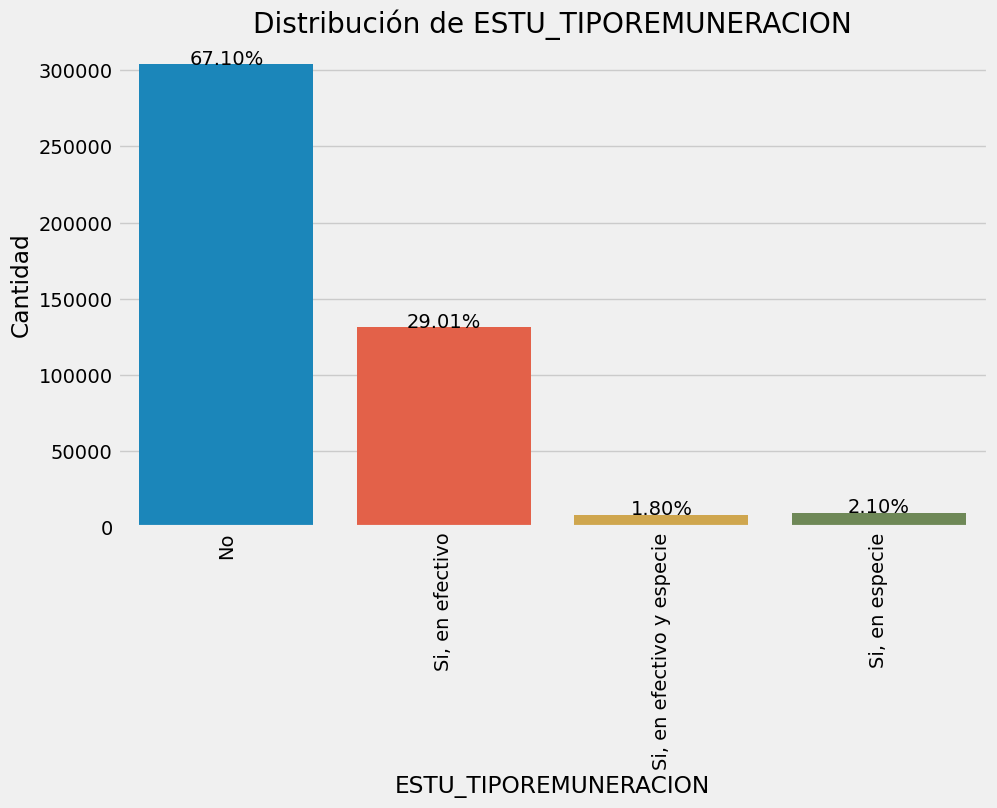

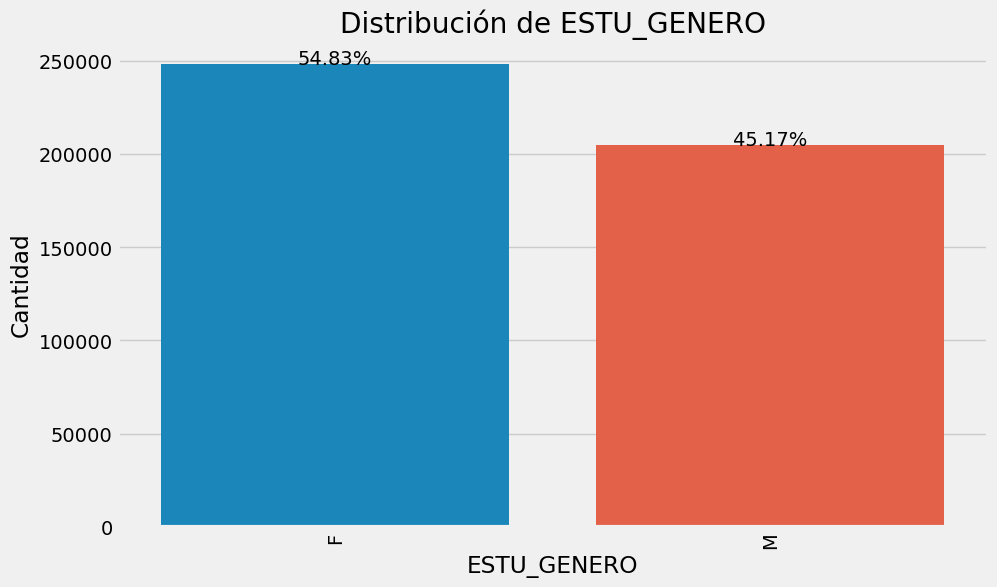

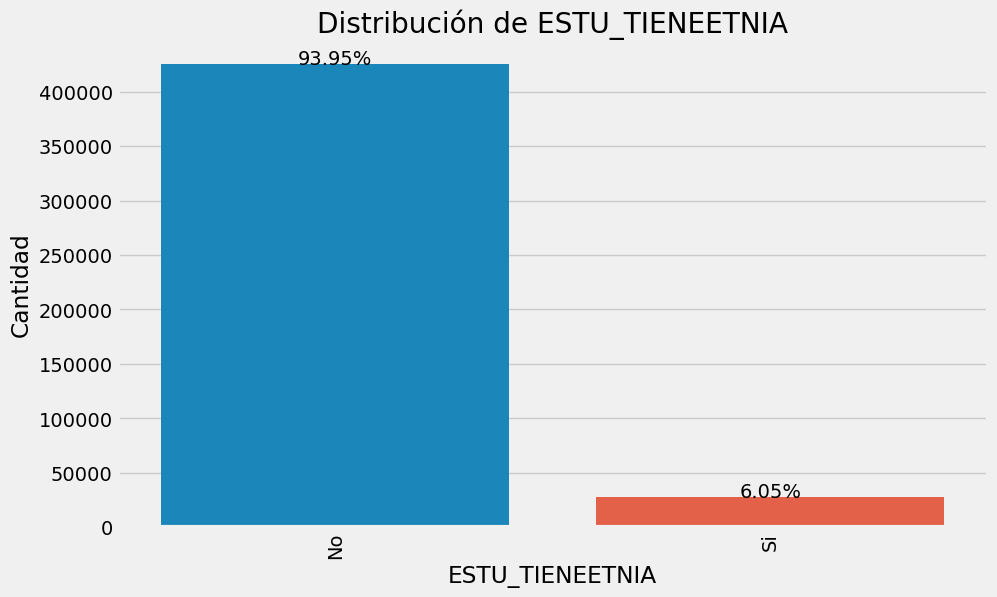

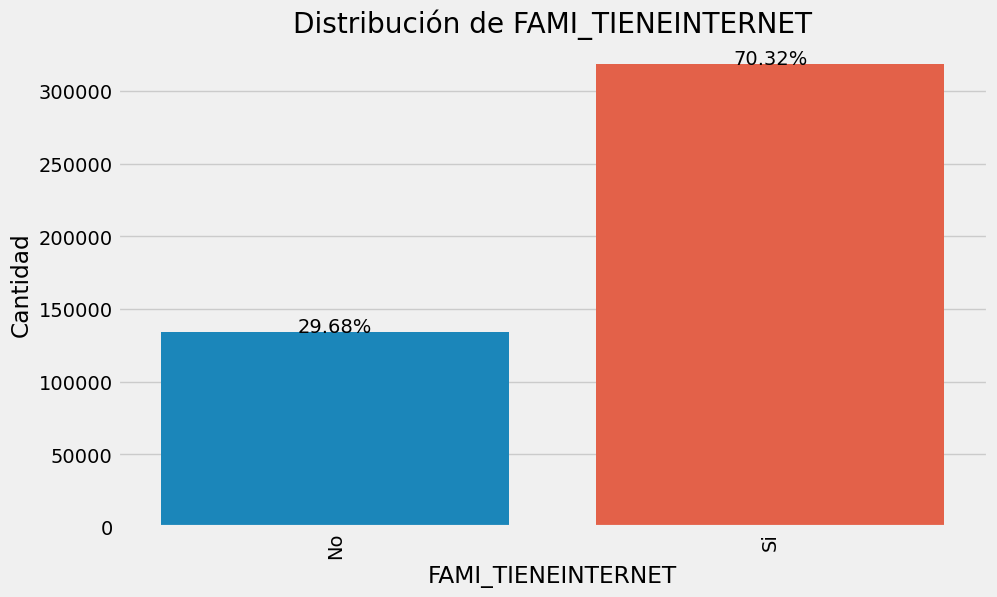

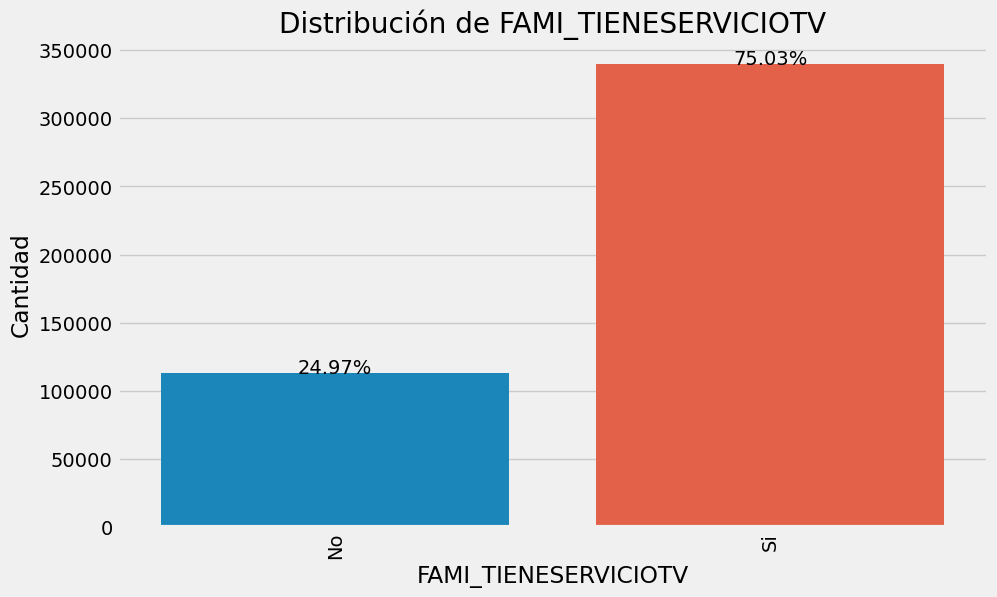

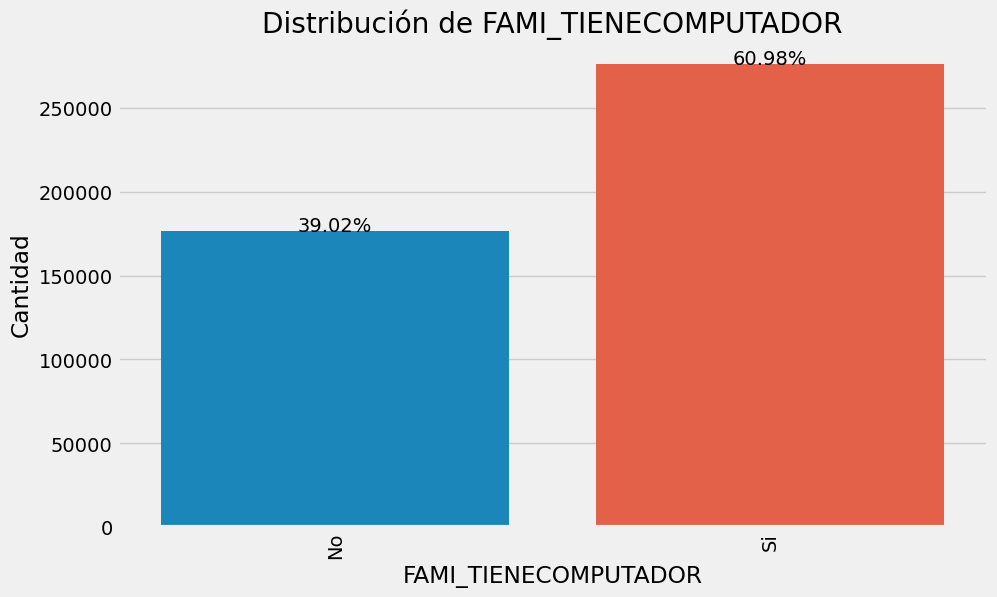

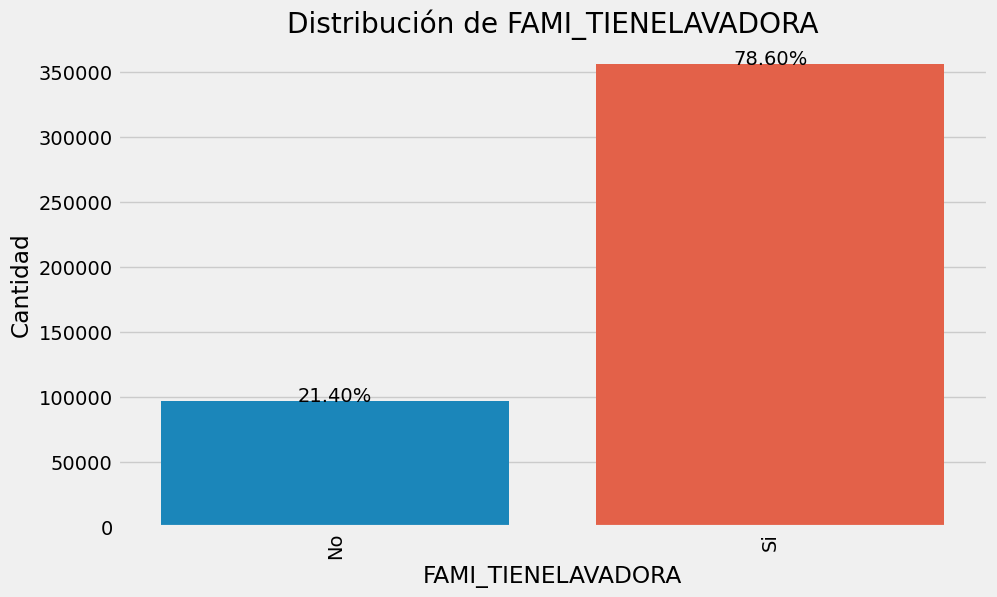

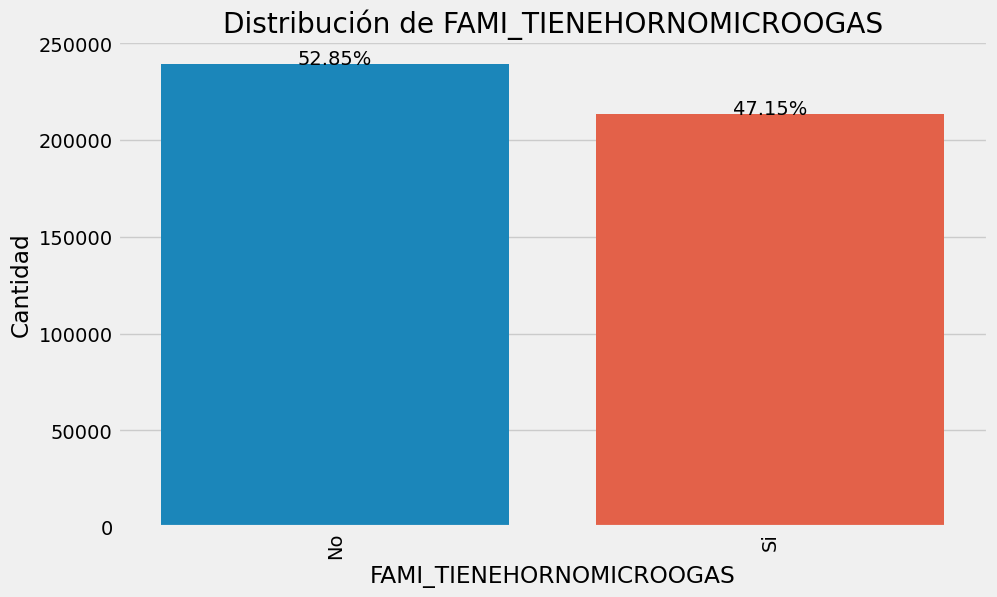

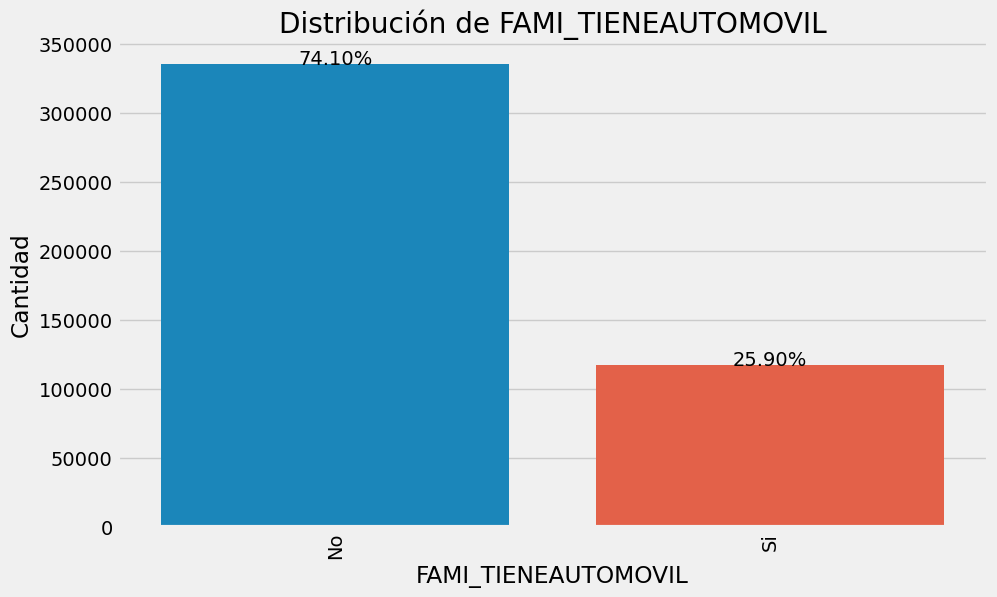

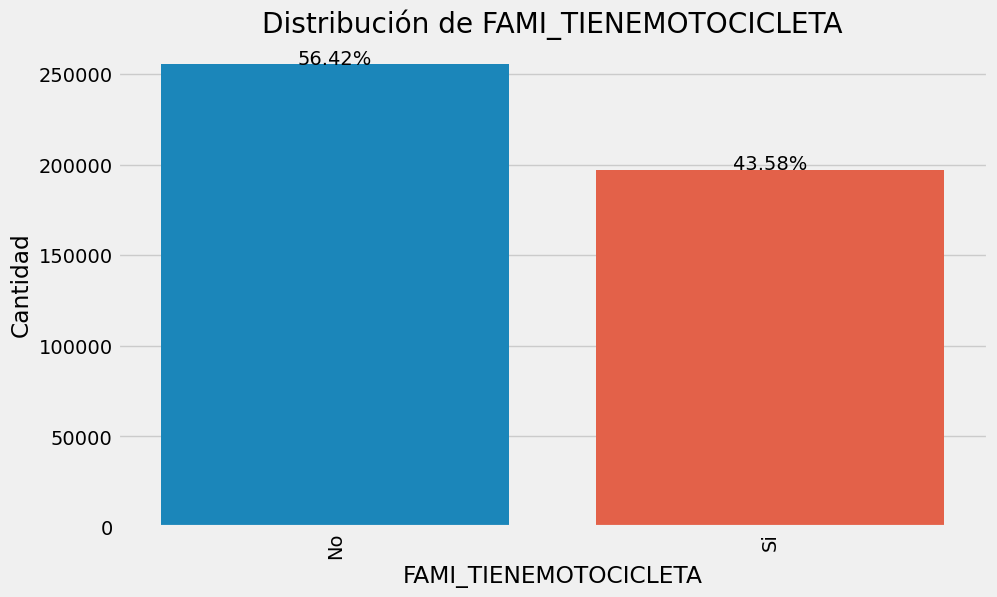

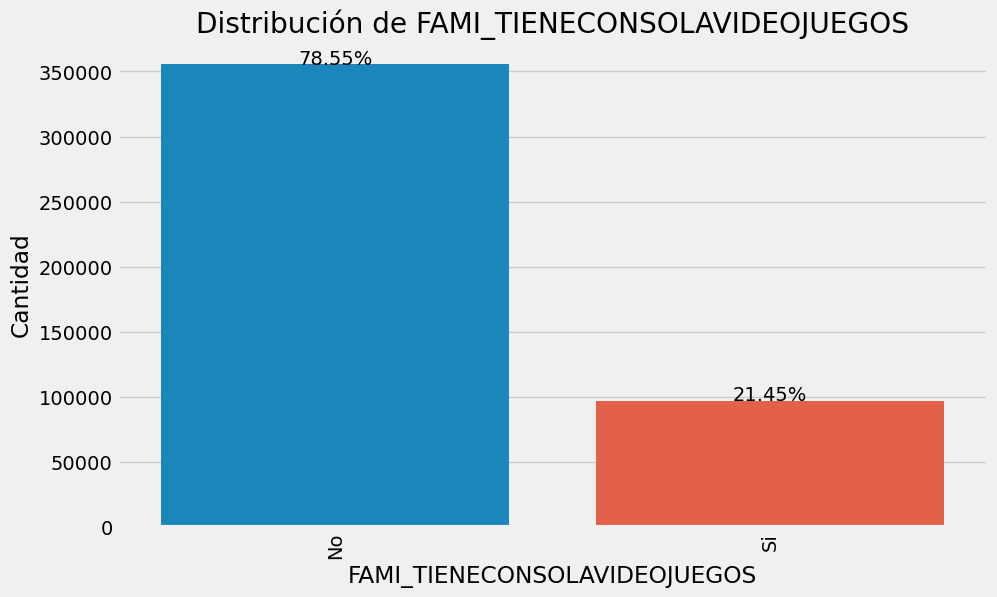

In [40]:
# Distribución de algunas variables categóricas
plt.style.use("fivethirtyeight")
for col in columnas_a_categoria:
    plt.figure(figsize=(10, 6))
    total = float(len(df_sin_duplicados))  # Obtener el total de filas para el cálculo del porcentaje
    ax = sns.countplot(x=col, data=df_sin_duplicados)
    
    # Calcular y mostrar los porcentajes en las barras
    for p in ax.patches:
        height = p.get_height()  # Obtener la altura de cada barra
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 3,  # Posición del texto (un poco por encima de la barra)
                '{:1.2f}%'.format((height / total) * 100),  # Formato del porcentaje
                ha="center")  # Alineación del texto
    
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor visualización
    plt.ylabel('Cantidad')
    plt.show()


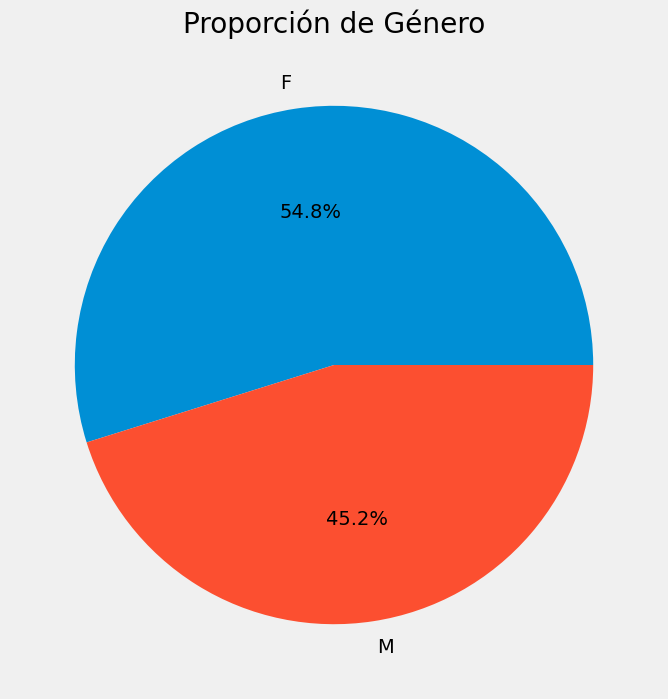

In [42]:
# Gráfico de pastel para una variable categórica
plt.figure(figsize=(8, 8))
df_sin_duplicados['ESTU_GENERO'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporción de Género')
plt.ylabel('')
plt.show()

Text(0, 0.5, 'Puntaje Global')

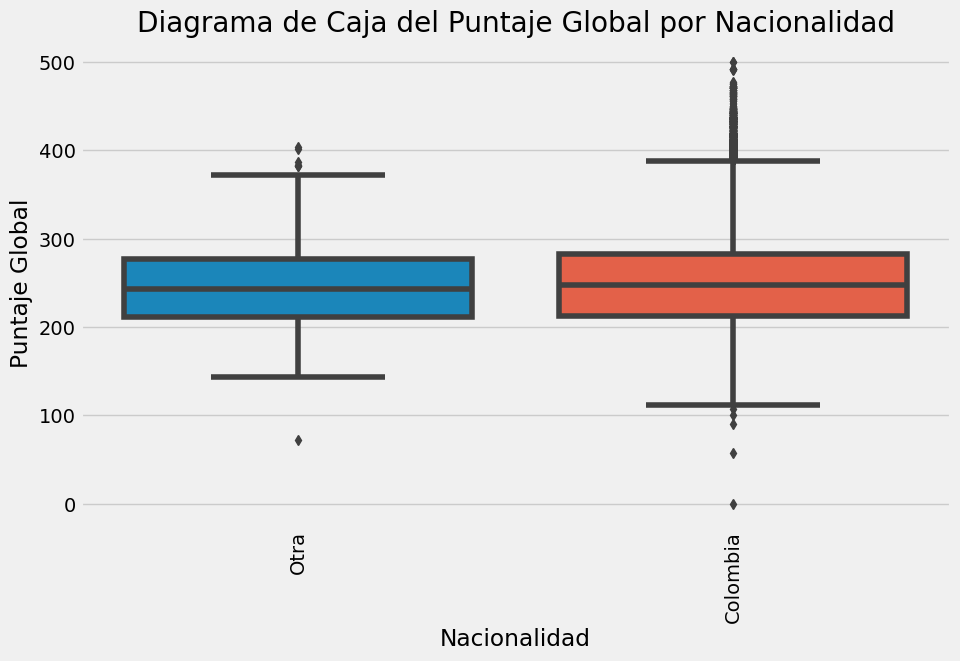

In [43]:
df_graficas = df_sin_duplicados.copy()
df_graficas['ESTU_NACIONALIDAD_CAT'] = df['ESTU_NACIONALIDAD'].apply(lambda x: 'Colombia' if x == 'COLOMBIA' else 'Otra')

# Create the boxplot

plt.figure(figsize=(10, 6))
sns.boxplot(x='ESTU_NACIONALIDAD_CAT', y=columna_y, data=df_graficas)

# Add title and labels
plt.title('Diagrama de Caja del Puntaje Global por Nacionalidad')
plt.xlabel('Nacionalidad')
plt.xticks(rotation=90)
plt.ylabel('Puntaje Global')

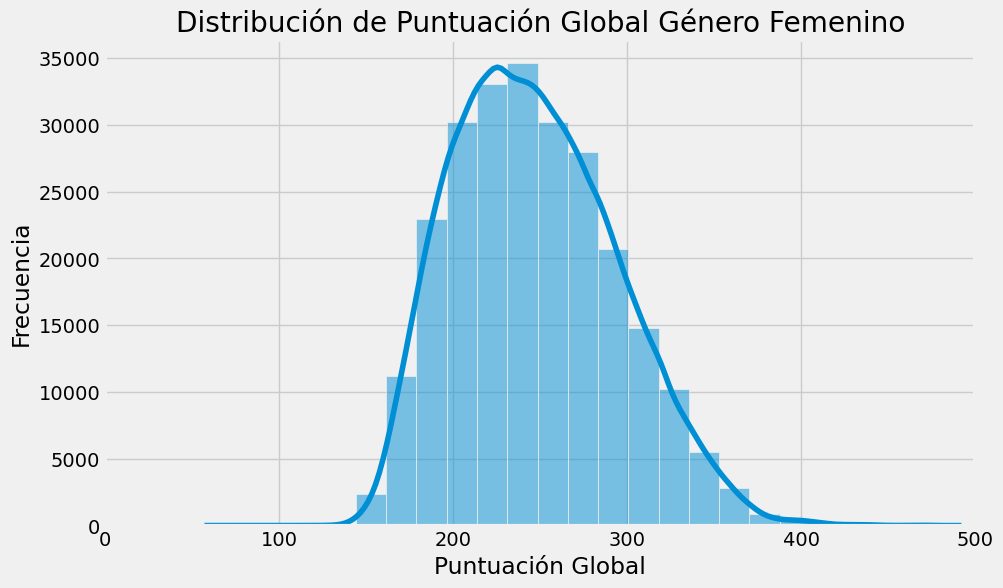

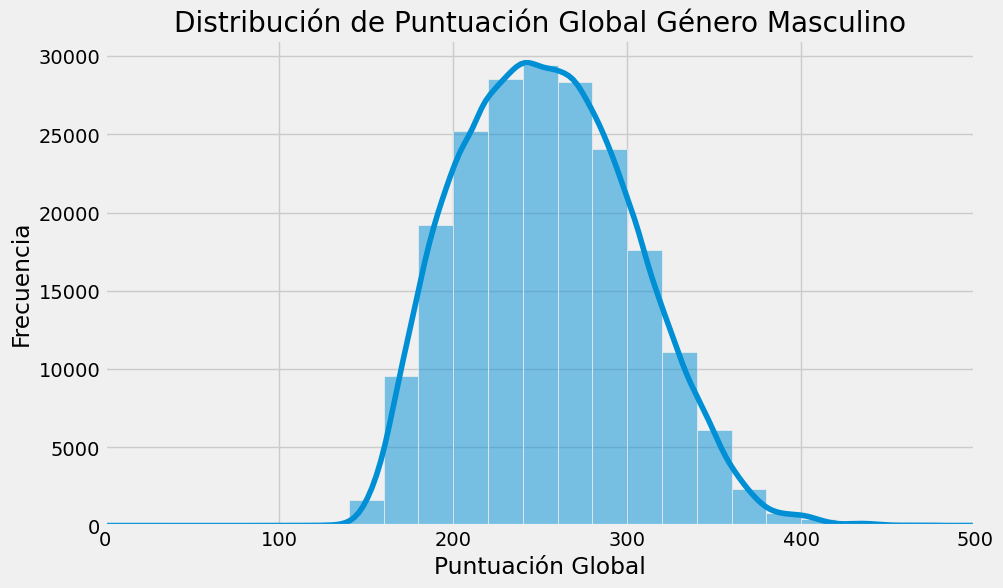

In [44]:
# Histograma para ver la variable PUNT_GLOBAL
# Determinar el máximo del puntaje global para hacer que las gráficas sigan la misma proporción
max_value = df_sin_duplicados[columna_y].max()

# Gráfica para ESTU_GENERO = F
plt.figure(figsize=(10, 6))
sns.histplot(df_sin_duplicados[df_sin_duplicados['ESTU_GENERO'] == 'F']['PUNT_GLOBAL'].copy(), bins=25, kde=True)
plt.style.use("fivethirtyeight")
plt.title('Distribución de Puntuación Global Género Femenino')
plt.xlabel('Puntuación Global')
plt.ylabel('Frecuencia')
plt.xlim(left=0, right=max_value)
plt.ylim(bottom=0)
plt.show()

# Gráfica para ESTU_GENERO = M
plt.figure(figsize=(10, 6))
sns.histplot(df_sin_duplicados[df_sin_duplicados['ESTU_GENERO'] == 'M']['PUNT_GLOBAL'].copy(), bins=25, kde=True)
plt.style.use("fivethirtyeight")
plt.title('Distribución de Puntuación Global Género Masculino')
plt.xlabel('Puntuación Global')
plt.ylabel('Frecuencia')
plt.xlim(left=0, right=max_value)
plt.ylim(bottom=0)
plt.show()

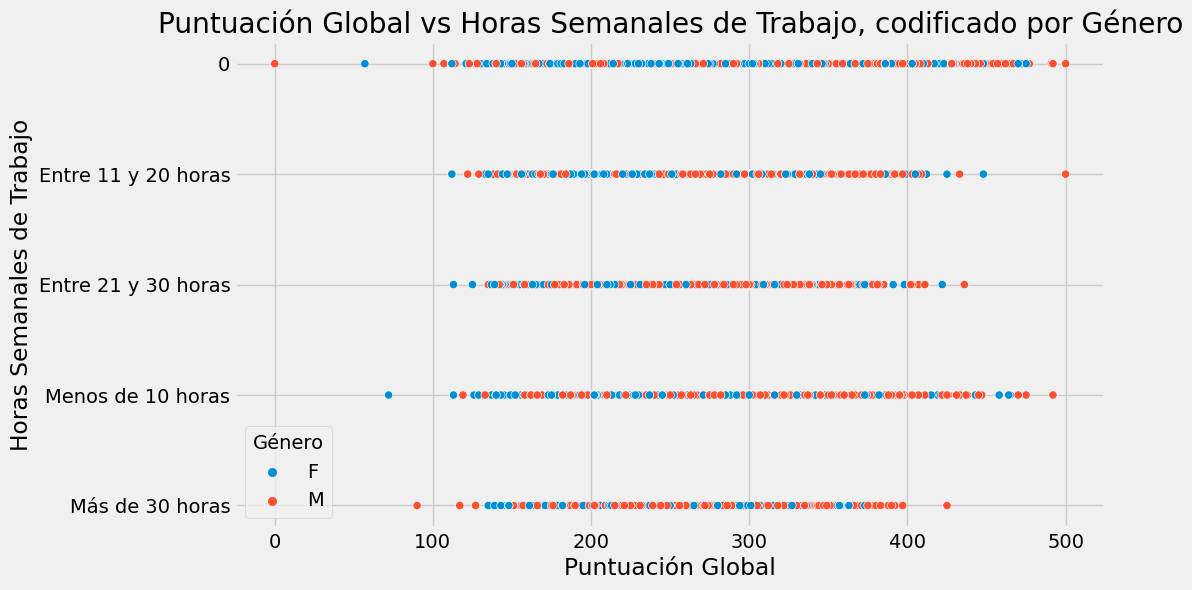

In [45]:
# Gráfico de dispersión con codificación de color
plt.figure(figsize=(10, 6))
sns.scatterplot(x=columna_y, y='ESTU_HORASSEMANATRABAJA', hue='ESTU_GENERO', data=df_sin_duplicados)
plt.title('Puntuación Global vs Horas Semanales de Trabajo, codificado por Género')
plt.xlabel('Puntuación Global')
plt.ylabel('Horas Semanales de Trabajo')
plt.legend(title='Género')
plt.show()

### Funciónes auxiliares

In [46]:
# Hacer un encode inicial y devolver el DataFrame luego de aplicar LabelEncoder a cada una de sus columnas de tipo categoría
# Devolver también los LabelEncoders utilizados
def label_encode_inicial(df):
    label_encoders = {}
    df_encoded = df.copy()
    
    for column in df_encoded.select_dtypes(include=['category']).columns:
        le = LabelEncoder()
        df_encoded[column] = le.fit_transform(df_encoded[column])
        label_encoders[column] = le
    
    return df_encoded, label_encoders

# Permite repetir el LabelEncode teniendo los LabelEncoders
def label_encode(df, label_encoders):
    df_encoded = df.copy()
    
    for column in df_encoded.select_dtypes(include=['category']).columns:
        le = label_encoders[column]
        df_encoded[column] = le.transform(df_encoded[column])
    
    return df_encoded

def convertir_punt_global_categoria(df, columna, minimo, maximo, n_bins):
    df_convertir = df.copy()
    
    valores = list(range(1, n_bins + 1))
    bins = np.linspace(minimo, maximo, n_bins+1)
    bins[0] -= 1
    
    rangos = []
    for i in range(len(bins) - 1):
        if i == 0:
            rangos.append(f"{bins[i]+1} ≤ {columna} ≤ {bins[i+1]}")
        else:
            rangos.append(f"{bins[i]} < {columna} ≤ {bins[i+1]}")
    
    y = pd.cut(df_convertir[columna], bins, labels=valores)
    
    return y, rangos

# bins_icfes = [-1,175, 250, 350,500]
# categoria_icfes = ["Insuficiente", "Mínimo", "Satisfactorio", "Avanzado"]

def escalar_estandar(df):
    df_escalado = df.copy()

    scaler = StandardScaler().set_output(transform="pandas")
    df_escalado = scaler.fit_transform(df_escalado)
    
    return df_escalado, scaler
    


## Matriz de correlación de variables:

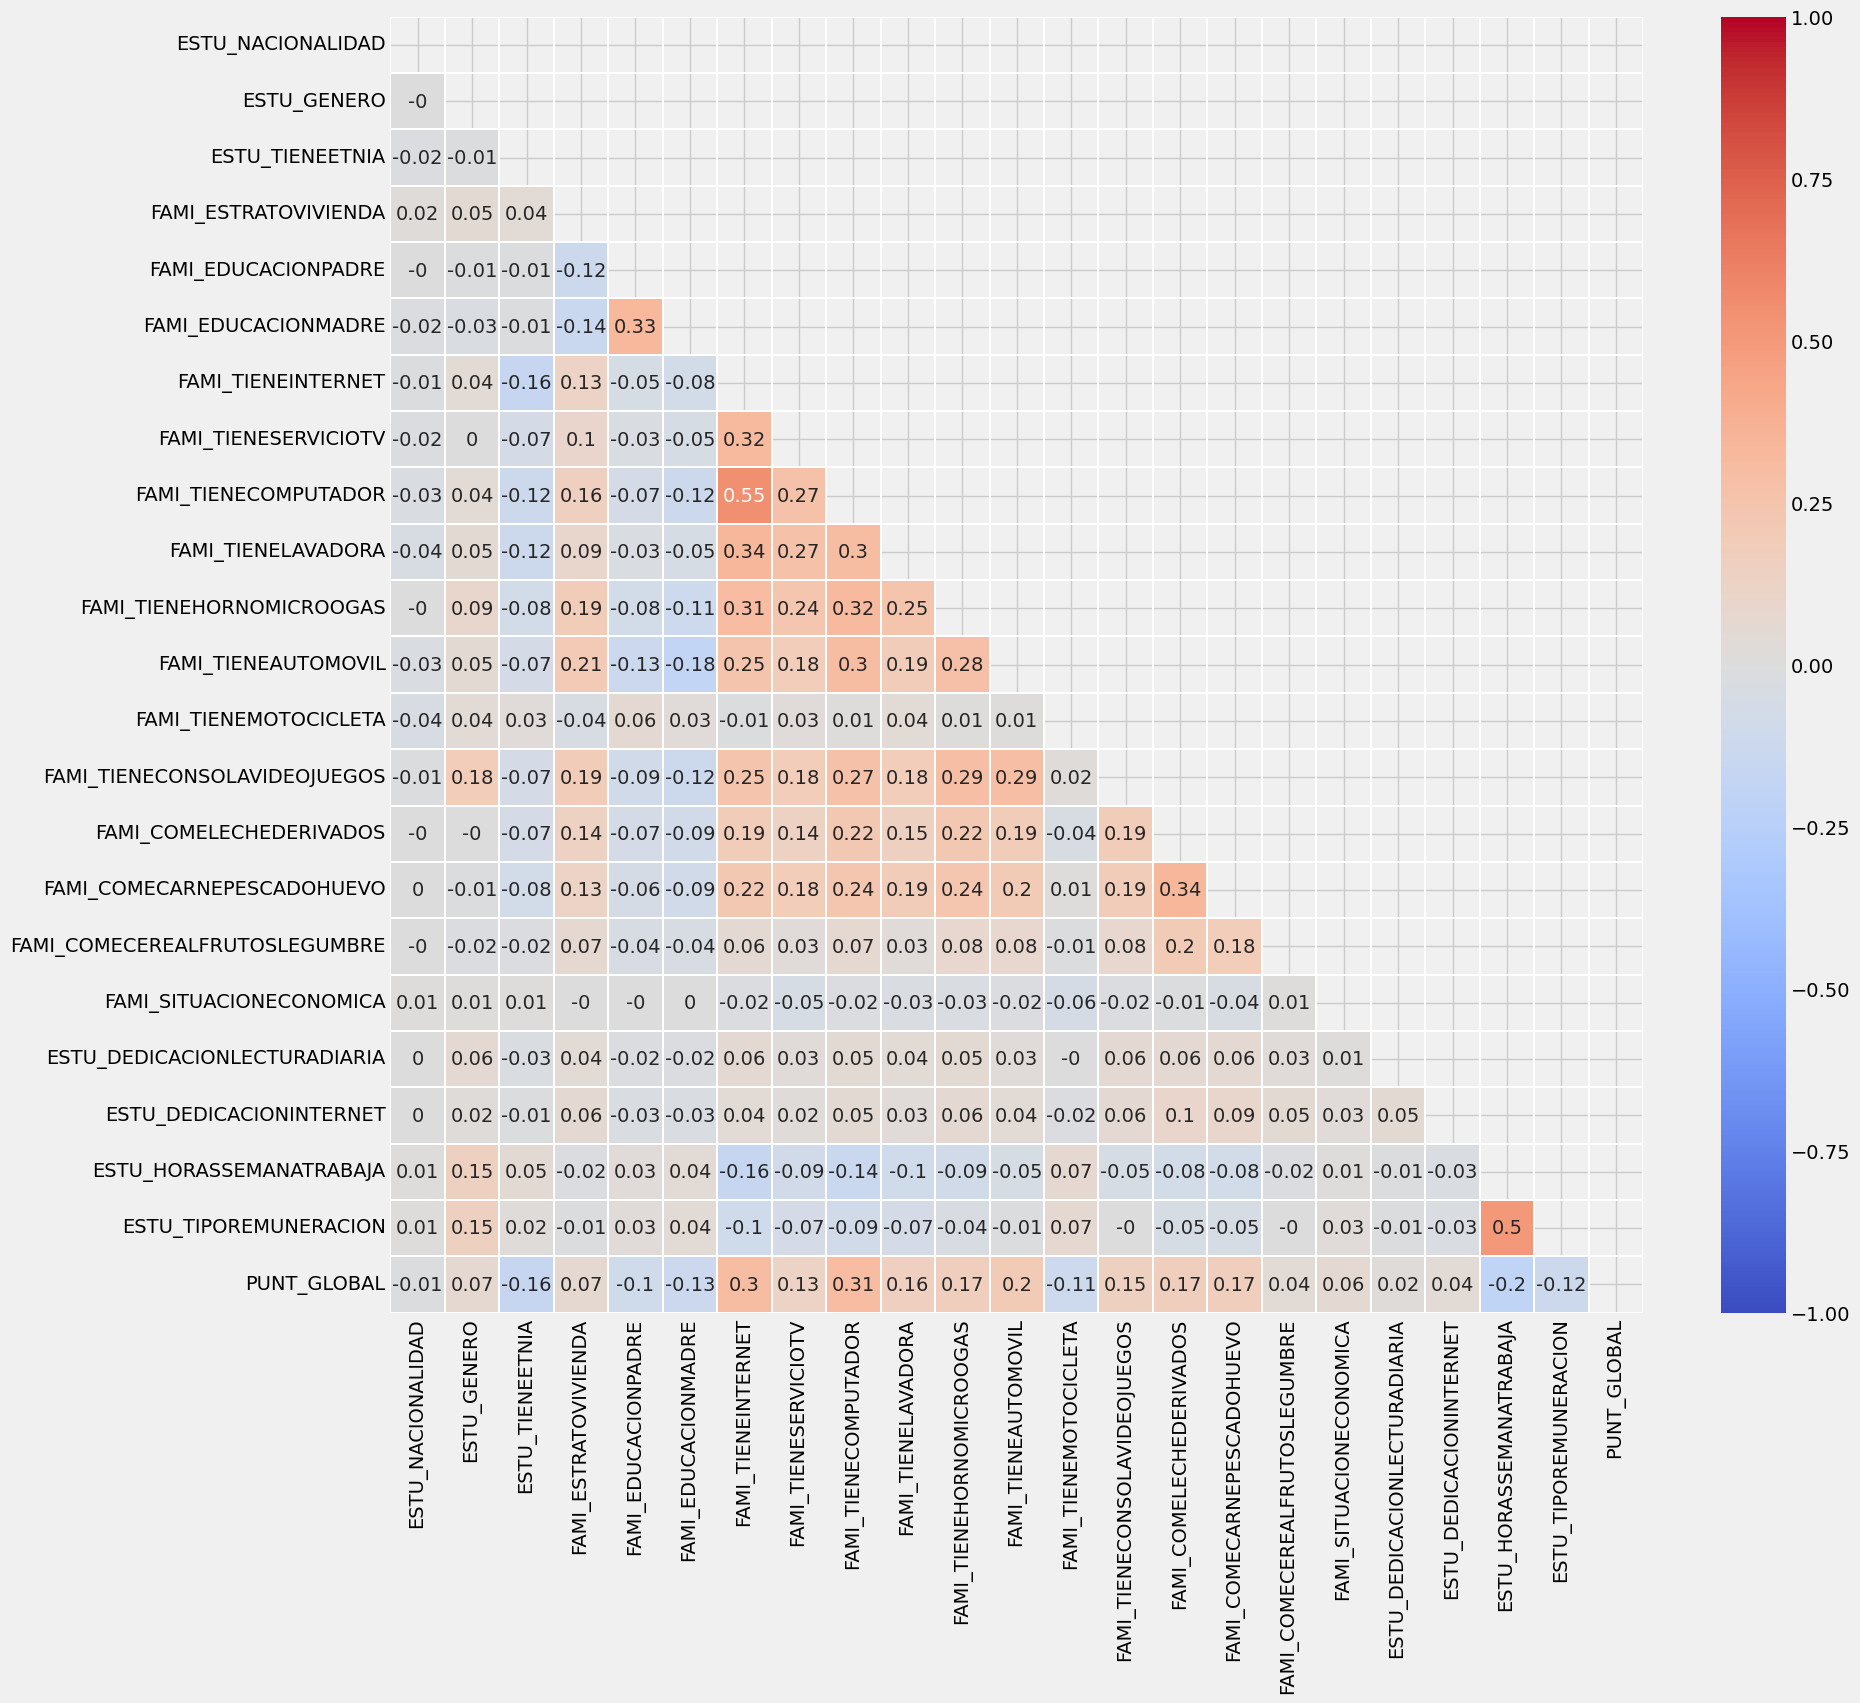

In [47]:
# Hacer label encode a las variables
corr_df_encoded, label_encoders = label_encode_inicial(df_sin_duplicados)

# Matriz de Correlación:
pio.templates.default = "plotly_white"
 
# Matriz de correlaciones:
corr_df = corr_df_encoded.corr(method='pearson').round(2)
plt.figure(figsize=(18, 16))
mask = np.triu(np.ones_like(corr_df, dtype=bool))
sns.heatmap(corr_df, annot=True, vmax=1, vmin=-1, 
    center=0, cmap=sns.color_palette("coolwarm", as_cmap=True), 
    mask=mask, linewidth=.3)
plt.show()

# Modelos de Predicción

## Variable Dependiente

In [50]:
# Guardar la columna de puntaje global en un nuevo DataFrame
puntaje_global = df_sin_duplicados[columna_y].copy()

# Valores mínimos y máximos obtenibles en las pruebas Saber 11
minimo_s11 = 0
maximo_s11 = 500
n_bins = 5

# Convertir el puntaje global a categoría
puntaje_global_cat, labels_puntaje_global_cat = convertir_punt_global_categoria(df_sin_duplicados,columna_y, minimo_s11, maximo_s11,n_bins)

## Clustering

In [51]:
# Copiar el DataFrame limpio
df_cl = df_sin_duplicados.copy()

# Usar los LabelEncoders generados en la Matriz de correlación
df_cl_encoded = label_encode(df_cl,label_encoders)

# Remover la variable dependiente del DataFrame
df_cl_encoded = df_cl_encoded.drop(columns=columna_y)

# Aplicar un StandardScaler al DataFrame
X_cl, scaler = escalar_estandar(df_cl_encoded)

# DataFrame con LabelEncode aplicado
X_cl.head()

,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_TIENEETNIA,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,...,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION
0,11.643089,-0.907692,-0.253791,-0.169703,1.203997,-2.145283,0.649607,0.576951,0.799885,0.521838,...,1.137816,-0.522606,-0.267988,-1.298351,-0.048222,1.662726,-1.033241,1.033126,-0.712838,-0.615359
1,13.205715,1.101695,-0.253791,0.606011,0.530409,-2.145283,0.649607,0.576951,-1.250180,-1.916302,...,-0.878877,-0.522606,-0.267988,1.123919,-0.048222,0.452315,1.615034,1.033126,0.013028,0.966719
2,13.205715,-0.907692,-0.253791,-0.945417,0.193615,0.732689,-1.539392,0.576951,-1.250180,0.521838,...,1.137816,-0.522606,-1.083787,-0.490927,-0.048222,-0.758096,0.290897,-1.587003,-0.712838,0.966719
3,13.205715,1.101695,-0.253791,3.708868,0.867203,-2.145283,0.649607,0.576951,-1.250180,0.521838,...,-0.878877,-0.522606,0.547812,0.316496,-0.048222,1.662726,-1.033241,-0.713627,-0.712838,-0.615359
4,-0.076601,-0.907692,-0.253791,2.157440,0.530409,-2.145283,0.649607,0.576951,0.799885,0.521838,...,-0.878877,1.913488,1.363611,1.123919,-0.048222,-0.758096,-0.371172,-0.713627,1.464761,0.966719


In [52]:
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(X_cl, puntaje_global, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train_cl.shape)
print("X_test shape:", X_test_cl.shape)
print("y_train shape:", y_train_cl.shape)
print("y_test shape:", y_test_cl.shape)

X_train shape: (362148, 22)
X_test shape: (90538, 22)
y_train shape: (362148,)
y_test shape: (90538,)


La cantidad programáticamente recomendada de clusters es de:  8


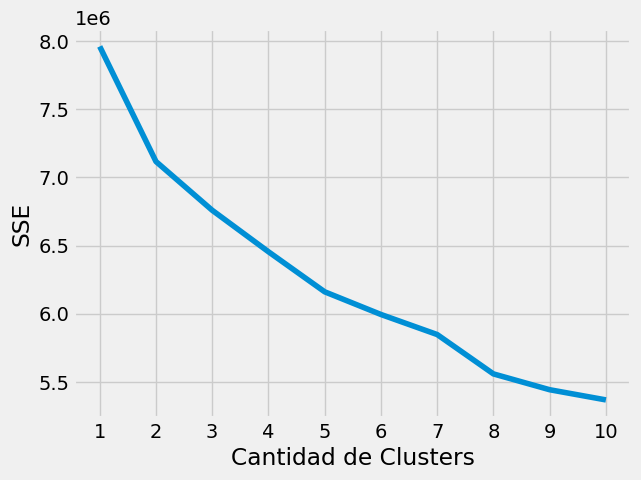

In [53]:
# Definir los argumentos para KMeans y poder probar
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# Recopilar el SSE con distintas cantidades de clusters
sse = []
n_clusters_min = 1
n_clusters_max = 10

for k in range(n_clusters_min, n_clusters_max + 1):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_train_cl)
    sse.append(kmeans.inertia_)

# Encontrar el codo para definir la cantidad de clusters recomendable
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

print("La cantidad programáticamente recomendada de clusters es de: ",kl.elbow)

# Graficar el SSE para KMeans con distintas cantidades de clusters    
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Cantidad de Clusters")
plt.ylabel("SSE") #Suma de los cuadrados de los errores
plt.show()

### ¡Atención!

La siguiente celda tarda una cantidad significativa de tiempo en ejecutarse, los valores de su ejecución se han colocado en la celda que le sigue, si de igual manera desea ejecutarla, puede cambiar la primer línea de 
    
    estoy_seguro_ejecutar_celda = False
    
a

    estoy_seguro_ejecutar_celda = True

### ¡Atención!

In [54]:
estoy_seguro_ejecutar_celda = False

# Arreglo para guardar los coeficientes de silueta
silhouette_coefficients = []

celda_silueta_ejecutada = False

if estoy_seguro_ejecutar_celda:
    # Calcular los coeficientes de silueta para distintas cantidades de centroides
    for k in range(n_clusters_min + 1, n_clusters_max + 1):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(X_train_cl)
        score = silhouette_score(X_train_cl, kmeans.labels_)
        silhouette_coefficients.append(score)
    
    celda_silueta_ejecutada = True
    print("¡¡Se ha ejecutado la celda!!")
    print(silhouette_coefficients)
else:
    print("¡¡No se ha ejecutado la celda!!")

¡¡Se ha ejecutado la celda!!
[0.10603663595213936, 0.07309257807161473, 0.08104419605006453, 0.07517465405024043, 0.06208361305215369, 0.059692495217651693, 0.07498449480694933, 0.0668824723599449, 0.0633143599054871]


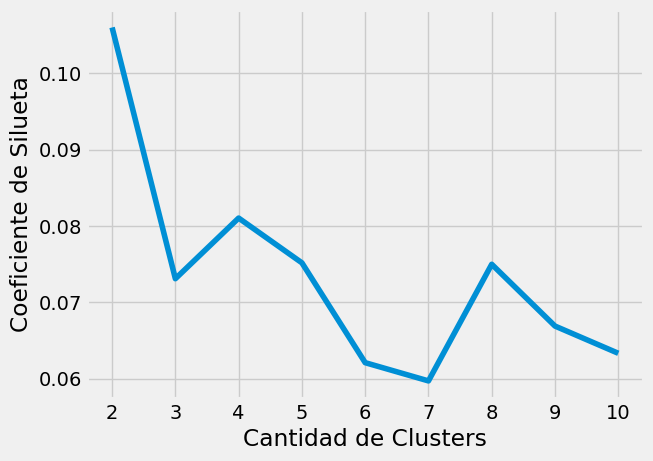

In [55]:
if not celda_silueta_ejecutada:
    silhouette_coefficients =  [0.10603663595213936, 0.07309257807161473, 0.08104419605006453, 0.07517465405024043, 0.06208361305215369, 0.059692495217651693, 0.07498449480694933, 0.0668824723599449, 0.0633143599054871]

# Graficar los componentes de silueta para cada una de las distintas cantidades de centroides
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Cantidad de Clusters")
plt.ylabel("Coeficiente de Silueta")
plt.show()

In [155]:
# Crear el modelo de KMeans con la cantidad de centroides (n_clusters) que se determinó como óptima en los pasos anteriores
kmeans = KMeans(n_clusters=8,init="k-means++",n_init=50,max_iter=300,random_state=42)
# Entrenar el modelo
kmeans.fit(X_train_cl)

KMeans(n_init=50, random_state=42)

In [156]:
# Realizar las predicciones
y_pred_cl = kmeans.predict(X_cl)

print(y_pred_cl)

[6 6 6 ... 4 1 0]


In [158]:
# Para todo el DataFrame, determinar el cluster correspondiente de cada registro
cluster = kmeans.predict(df_cl_encoded)

# Imprimir el cluster correspondiente de cada registro del DataFrame
print(cluster)

[6 6 6 ... 6 6 6]


## Decission Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
for columna in df_sin_duplicados.columns:
    if df_sin_duplicados[columna].dtype == 'category':  # Verifica si la columna es de tipo 'category' (categórica)
        print(columna)

ESTU_NACIONALIDAD
ESTU_GENERO
ESTU_TIENEETNIA
FAMI_ESTRATOVIVIENDA
FAMI_EDUCACIONPADRE
FAMI_EDUCACIONMADRE
FAMI_TIENEINTERNET
FAMI_TIENESERVICIOTV
FAMI_TIENECOMPUTADOR
FAMI_TIENELAVADORA
FAMI_TIENEHORNOMICROOGAS
FAMI_TIENEAUTOMOVIL
FAMI_TIENEMOTOCICLETA
FAMI_TIENECONSOLAVIDEOJUEGOS
FAMI_COMELECHEDERIVADOS
FAMI_COMECARNEPESCADOHUEVO
FAMI_COMECEREALFRUTOSLEGUMBRE
FAMI_SITUACIONECONOMICA
ESTU_DEDICACIONLECTURADIARIA
ESTU_DEDICACIONINTERNET
ESTU_HORASSEMANATRABAJA
ESTU_TIPOREMUNERACION


In [27]:
# Label encoding del dataframe

df_tree = df_sin_duplicados.copy()

#bins = [-1,175, 250, 350,500]
#categoriaLabel = [1, 2, 3, 4]
#categoria = ["Insuficiente", "Mínimo", "Satisfactorio", "Avanzado"]
categoria = ["0 a 100", "100 a 200", "200 a 300", "300 a 400", "400 a 500"]

bins = [-1,100, 200, 300,400, 500]
categoriaLabel = [1, 2, 3, 4, 5]

#bins = [-1, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
#categoriaLabel = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


y = pd.cut(df_tree["PUNT_GLOBAL"], bins, labels=categoriaLabel)
puntaje_global = df_tree["PUNT_GLOBAL"]

df_tree_encoded = df_tree.copy()

# Inicializa el codificador de etiquetas
label_encoder = LabelEncoder()

# Itera sobre cada columna categórica y aplica LabelEncoder
for columna in df_tree_encoded.columns:
    if df_tree_encoded[columna].dtype == 'category':  # Verifica si la columna es de tipo 'category' (categórica)
        df_tree_encoded[columna] = label_encoder.fit_transform(df_tree_encoded[columna])
        
df_tree_encoded['cluster'] = cluster

In [28]:
# Selección de features con prueba chi2
cantidad_features = 10

chi_scores, p_values = chi2(df_tree_encoded.drop(columns='PUNT_GLOBAL'), y)
chi2_df = pd.DataFrame({
    'Feature': df_tree_encoded.drop(columns='PUNT_GLOBAL').columns,
    'Puntaje Chi2': chi_scores,
    'P-valor': p_values
})
chi2_df = chi2_df.sort_values(by='Puntaje Chi2', ascending=False)
print("Puntajes Chi2")
print(chi2_df)
print("===========================")

top_features_chi2 = chi2_df.head(10)
print('Top {} features basados en el puntaje Chi2: '.format(cantidad_features))
print(top_features_chi2['Feature'])

Puntajes Chi2
                          Feature  Puntaje Chi2        P-valor
20        ESTU_HORASSEMANATRABAJA  25859.184103   0.000000e+00
5             FAMI_EDUCACIONMADRE  14258.076281   0.000000e+00
8            FAMI_TIENECOMPUTADOR  12657.373998   0.000000e+00
11            FAMI_TIENEAUTOMOVIL  11865.070153   0.000000e+00
14        FAMI_COMELECHEDERIVADOS  11833.035287   0.000000e+00
3            FAMI_ESTRATOVIVIENDA  10830.892255   0.000000e+00
2                 ESTU_TIENEETNIA  10631.942120   0.000000e+00
15     FAMI_COMECARNEPESCADOHUEVO   9442.786238   0.000000e+00
6              FAMI_TIENEINTERNET   9210.723770   0.000000e+00
4             FAMI_EDUCACIONPADRE   9199.880731   0.000000e+00
13   FAMI_TIENECONSOLAVIDEOJUEGOS   6984.194290   0.000000e+00
10       FAMI_TIENEHORNOMICROOGAS   5548.289624   0.000000e+00
21          ESTU_TIPOREMUNERACION   5182.898430   0.000000e+00
12          FAMI_TIENEMOTOCICLETA   2257.276428   0.000000e+00
9              FAMI_TIENELAVADORA   1977.

In [29]:
# Estandarización y pca

sc = StandardScaler().set_output(transform="pandas")
scaled_data = sc.fit_transform(df_tree_encoded)

# Eliminar la variable dependiente del DataFrame
X = scaled_data.drop(columns='PUNT_GLOBAL').copy()

print("DataFrame después de aplicar LabelEncoder:")
print(X)

# Definir la cantidad de componentes principales a utilizar
cantidad_pc = 10
pca = PCA(n_components=cantidad_pc)

# Generar los nombres de columnas para los componentes principales
pc_cols = []
for i in range(1, cantidad_pc + 1):
    pc_cols.append(f"PC{i}")
    
# Calcular las componentes principales
X_pca = pd.DataFrame(data = pca.fit_transform(X), columns = pc_cols)

print("===========================")
print("DataFrame después de aplicar PCA:")
print(X_pca)

print("===========================")
print('Varianza explicada por componente principal: {}'.format(pca.explained_variance_ratio_))
print("===========================")
print('Información perdida: {}'.format(1-sum(pca.explained_variance_ratio_)))


DataFrame después de aplicar LabelEncoder:
        ESTU_NACIONALIDAD  ESTU_GENERO  ESTU_TIENEETNIA  FAMI_ESTRATOVIVIENDA  \
0               11.643089    -0.907692        -0.253791             -0.169703   
1               13.205715     1.101695        -0.253791              0.606011   
2               13.205715    -0.907692        -0.253791             -0.945417   
3               13.205715     1.101695        -0.253791              3.708868   
4               -0.076601    -0.907692        -0.253791              2.157440   
...                   ...          ...              ...                   ...   
504867          -0.076601     1.101695        -0.253791             -0.169703   
504868          -0.076601     1.101695        -0.253791             -0.169703   
504869          -0.076601    -0.907692        -0.253791             -0.169703   
504870          -0.076601     1.101695        -0.253791             -0.169703   
504871          -0.076601    -0.907692        -0.253791           

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("===============================")
print("X_train_pca shape:", X_train_pca.shape)
print("X_test_pca shape:", X_test_pca.shape)
print("y_train_pca shape:", y_train_pca.shape)
print("y_test_pca shape:", y_test_pca.shape)

X_train shape: (362148, 22)
X_test shape: (90538, 22)
y_train shape: (362148,)
y_test shape: (90538,)
X_train_pca shape: (362148, 10)
X_test_pca shape: (90538, 10)
y_train_pca shape: (362148,)
y_test_pca shape: (90538,)


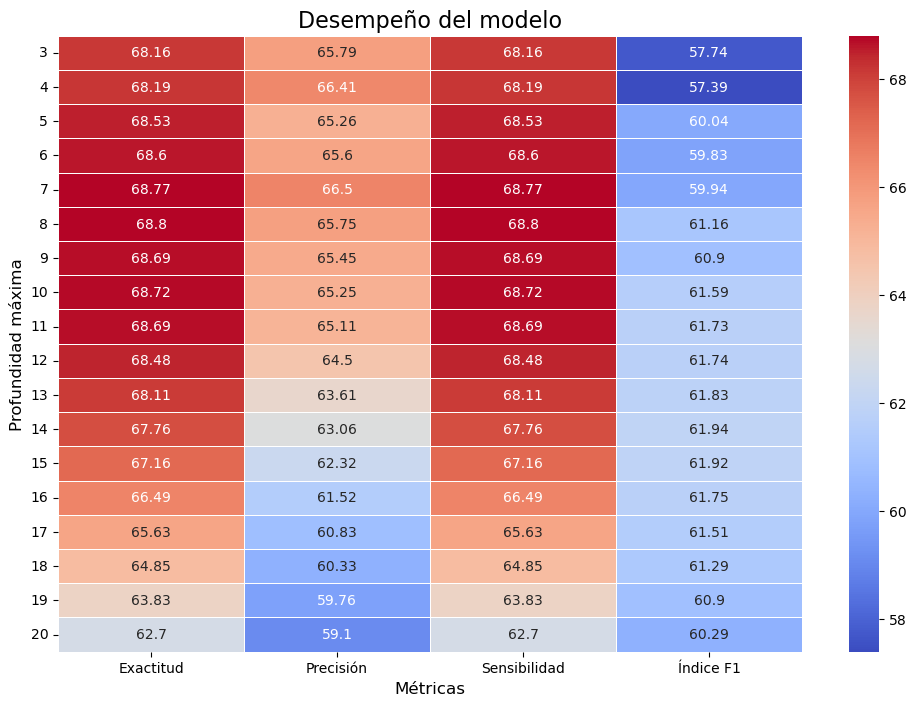

In [31]:
# Encontrar profundidad máxima óptima

resultados_dt = []

for num in range(3, 21):
    # Árbol
    dt_poda = DecisionTreeClassifier(max_depth=num,random_state=42)
    # Entrenamiento
    dt_poda = dt_poda.fit(X_train, y_train)
    # Predicciones
    y_pred_dt_poda = dt_poda.predict(X_test)

    resultados_dt.append({
        "Profundidad": num,
        "Exactitud": round(metrics.accuracy_score(y_test, y_pred_dt_poda)*100,2),
        "Precisión": round(metrics.precision_score(y_test, y_pred_dt_poda, average='weighted', zero_division=1)*100,2),
        "Sensibilidad": round(metrics.recall_score(y_test, y_pred_dt_poda, average='weighted', zero_division=1)*100,2),
        "Índice F1": round(metrics.f1_score(y_test, y_pred_dt_poda, average='weighted', zero_division=1)*100,2)
    })

# Convertir a DataFrame para graficar
resultados_dt_df = pd.DataFrame(resultados_dt)
resultados_dt_df.set_index("Profundidad", inplace=True)

# Crear mapa de calor
plt.figure(figsize=(12, 8))
ax = sns.heatmap(resultados_dt_df, annot=True, cmap='coolwarm', fmt=".5g", linewidths=.5)

# Add title and labels
plt.title("Desempeño del modelo", fontsize=16)
plt.xlabel("Métricas", fontsize=12)
plt.ylabel("Profundidad máxima", fontsize=12)

ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Show the heatmap
plt.show()

In [32]:
dtree = DecisionTreeClassifier(max_depth=8,random_state=42)
dtree = dtree.fit(X_train, y_train)

dtree_pca = DecisionTreeClassifier(max_depth=8,random_state=42)
dtree_pca = dtree_pca.fit(X_train_pca, y_train_pca)

In [33]:
y_pred_dt = dtree.predict(X_test)
y_pred_dt_pca = dtree_pca.predict(X_test_pca)

In [34]:
report = classification_report(y_test, y_pred_dt, target_names=categoria, output_dict=True, zero_division=0.0)

report_df = pd.DataFrame(report).transpose()
print(report_df)

print("===============================")

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))
print("Precision:",metrics.precision_score(y_test, y_pred_dt, average='weighted', zero_division=1))
print("Recall:",metrics.recall_score(y_test, y_pred_dt, average='weighted', zero_division=1))
print("F1 Score:",metrics.f1_score(y_test, y_pred_dt, average='weighted', zero_division=1))
print("===============================")
print("Accuracy_pca:",metrics.accuracy_score(y_test_pca, y_pred_dt_pca))
print("Precision_pca:",metrics.precision_score(y_test_pca, y_pred_dt_pca, average='weighted', zero_division=1))
print("Recall_pca:",metrics.recall_score(y_test_pca, y_pred_dt_pca, average='weighted', zero_division=1))
print("F1 Score_pca:",metrics.f1_score(y_test_pca, y_pred_dt_pca, average='weighted', zero_division=1))

ValueError: Number of classes, 4, does not match size of target_names, 5. Try specifying the labels parameter

## Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, precision_score, cohen_kappa_score
import time

In [25]:
#Instanciando el modelo:
random_forest = RandomForestClassifier(random_state=42)

#Ajustando el modelo a los datos de entrenamiento:
random_forest.fit(X_train, y_train)

#Realizando predicciones con el conjunto de prueba:
y_pred_rf = random_forest.predict(X_test)

#Instanciando el modelo:
random_forest_pca = RandomForestClassifier(random_state=42)

#Ajustando el modelo a los datos de entrenamiento:
random_forest_pca.fit(X_train_pca, y_train_pca)

#Realizando predicciones con el conjunto de prueba:
y_pred_rf_pca = random_forest_pca.predict(X_test_pca)

In [26]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision:",metrics.precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred_rf, average='weighted'))
print("F1 Score:",metrics.f1_score(y_test, y_pred_rf, average='weighted'))
print("===============================")
print("Accuracy_pca:",metrics.accuracy_score(y_test_pca, y_pred_rf_pca))
print("Precision_pca:",metrics.precision_score(y_test_pca, y_pred_rf_pca, average='weighted'))
print("Recall_pca:",metrics.recall_score(y_test_pca, y_pred_rf_pca, average='weighted'))
print("F1 Score_pca:",metrics.f1_score(y_test_pca, y_pred_rf_pca, average='weighted'))

Accuracy: 0.679571008858159
Precision: 0.6363029596072018
Recall: 0.679571008858159
F1 Score: 0.6212703973593061
Accuracy_pca: 0.6752523802160418
Precision_pca: 0.6237538386577145
Recall_pca: 0.6752523802160418
F1 Score_pca: 0.6070238165698156


## Matríz de Confusión pra Random Forest

<Figure size 1400x1000 with 0 Axes>

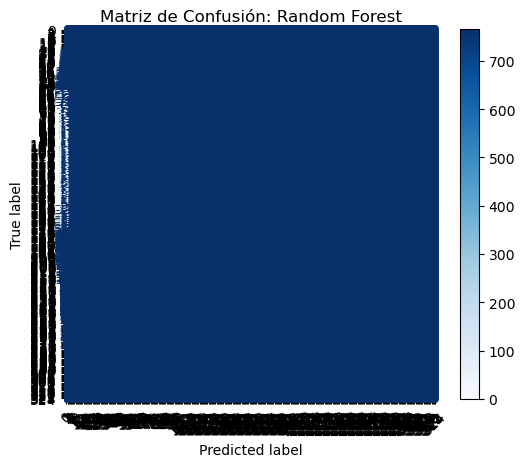

In [158]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Ajustar el tamaño de la figura
plt.figure(figsize=(14, 10))

# Visualizar la matriz de confusión con anotaciones
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot(cmap='Blues', xticks_rotation=45)  # Rotar las etiquetas del eje x

# Ajustar el tamaño de las etiquetas del eje y
plt.gca().set_yticklabels(plt.gca().get_yticklabels(), rotation=0, ha='right', fontsize=10)

# Título y mostrar
plt.title('Matriz de Confusión: Random Forest')
plt.show()




## Regresión Lineal Múltiple

In [28]:
#Se importan las librerías necesarias

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
# Definir las variables dependientes e independientes

#Se guarda la variable dependiente en Y , para despues independizarla del resto del dataset.

y = df_sin_duplicados['PUNT_GLOBAL']



# Inicializa el codificador de etiquetas
label_encoder = LabelEncoder()

# Itera sobre cada columna categórica y aplica LabelEncoder
for columna in df_sin_duplicados.columns:
    if df_sin_duplicados[columna].dtype == 'category':  # Verifica si la columna es de tipo 'category' (categórica)
        df_sin_duplicados[columna] = label_encoder.fit_transform(df_sin_duplicados[columna])


# Eliminar la variable dependiente del DataFrame
X = df_sin_duplicados.drop(columns='PUNT_GLOBAL')
        
print("DataFrame después de aplicar LabelEncoder:")
print(X)

# Definir la cantidad de componentes principales a utilizar
cantidad_pc = 5
pca = PCA(n_components=cantidad_pc)

# Generar los nombres de columnas para los componentes principales
pc_cols = []
for i in range(1, cantidad_pc + 1):
    pc_cols.append(f"PC{i}")
    
# Calcular las componentes principales
X_pca_lr = pd.DataFrame(data = pca.fit_transform(X), columns = pc_cols)

print("DataFrame después de aplicar PCA:")
print(X_pca_lr)

print('Varianza explicada por componente principal: {}'.format(pca.explained_variance_ratio_))

print('Información perdida: {}'.format(1-sum(pca.explained_variance_ratio_)))



DataFrame después de aplicar LabelEncoder:
        ESTU_NACIONALIDAD  ESTU_GENERO  ESTU_TIENEETNIA  FAMI_ESTRATOVIVIENDA  \
0                      39            0                0                     1   
1                      43            1                0                     2   
2                      43            0                0                     0   
3                      43            1                0                     6   
4                       9            0                0                     4   
...                   ...          ...              ...                   ...   
504867                  9            1                0                     1   
504868                  9            1                0                     1   
504869                  9            0                0                     1   
504870                  9            1                0                     1   
504871                  9            0                0           

In [47]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_pca_lr, X_test_pca_lr, y_train_pca_lr, y_test_pca_lr = train_test_split(X_pca_lr, y, test_size=0.2, random_state=42)

In [48]:
# Crear el modelo de regresión lineal
model = LinearRegression()

model_pca_lr = LinearRegression()

In [49]:
# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

model_pca_lr.fit(X_train_pca_lr, y_train_pca_lr)

LinearRegression()

In [50]:
# Hacer predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

y_pred_pca_lr = model_pca_lr.predict(X_test_pca_lr)

In [51]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse_pca_lr = mean_squared_error(y_test_pca_lr, y_pred_pca_lr)
r2_pca_lr = r2_score(y_test_pca_lr, y_pred_pca_lr)

print(f'Error cuadrático medio (MSE): {mse}')
print(f'Coeficiente de determinación (R^2): {r2}')
print("========================================")
print(f'Error cuadrático medio (MSE) con PCA: {mse_pca_lr}')
print(f'Coeficiente de determinación (R^2) con PCA: {r2_pca_lr}')

Error cuadrático medio (MSE): 1873.9691613038483
Coeficiente de determinación (R^2): 0.19339862249900142
Error cuadrático medio (MSE) con PCA: 2122.2366895163696
Coeficiente de determinación (R^2) con PCA: 0.08653830997088174


In [139]:
# Mostrar los coeficientes de regresión
coef_df = pd.DataFrame(model.coef_, X.columns, columns=['Coeficiente'])
print(coef_df)

                               Coeficiente
ESTU_NACIONALIDAD                -0.074480
ESTU_GENERO                       7.662595
ESTU_TIENEETNIA                 -19.711522
FAMI_ESTRATOVIVIENDA             -0.968233
FAMI_EDUCACIONPADRE              -0.628197
FAMI_EDUCACIONMADRE              -0.859798
FAMI_TIENEINTERNET               13.664393
FAMI_TIENESERVICIOTV             -0.761379
FAMI_TIENECOMPUTADOR             15.343604
FAMI_TIENELAVADORA                1.784822
FAMI_TIENEHORNOMICROOGAS          0.526860
FAMI_TIENEAUTOMOVIL               8.716517
FAMI_TIENEMOTOCICLETA            -8.551094
FAMI_TIENECONSOLAVIDEOJUEGOS      0.852437
FAMI_COMELECHEDERIVADOS           2.083677
FAMI_COMECARNEPESCADOHUEVO        1.736983
FAMI_COMECEREALFRUTOSLEGUMBRE    -0.433708
FAMI_SITUACIONECONOMICA           3.980102
ESTU_DEDICACIONLECTURADIARIA     -0.573785
ESTU_DEDICACIONINTERNET           0.124982
ESTU_HORASSEMANATRABAJA          -4.525321
ESTU_TIPOREMUNERACION            -1.762371


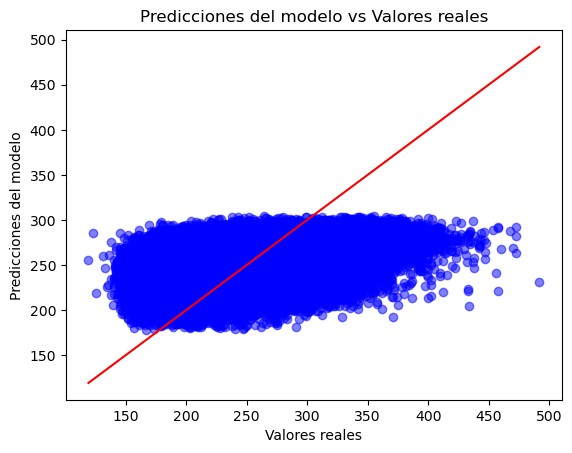

In [140]:
import matplotlib.pyplot as plt

# y_test es el conjunto de datos de prueba para la variable dependiente
# y_pred son las predicciones del modelo para el conjunto de datos de prueba
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)  # Scatter plot de valores reales vs predicciones
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Línea de 45 grados para referencia
plt.xlabel('Valores reales')
plt.ylabel('Predicciones del modelo')
plt.title('Predicciones del modelo vs Valores reales')
plt.show()